In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

In [2]:
# DSND colors: UBlue, Salmon, Gold, Slate
plot_colors = ['#02b3e4', '#ee2e76', '#ffb613', '#2e3d49']

# Light colors: Blue light, Salmon light
plot_lcolors = ['#88d0f3', '#ed8ca1', '#fdd270']

# Gray/bg colors: Slate Dark, Gray, Silver
plot_grays = ['#1c262f', '#aebfd1', '#fafbfc']

In [3]:
from matplotlib.colors import LinearSegmentedColormap

# colormap from UBlue - Gold - Salmon
cdict = {'red'  : [(0.0, 0.007843, 0.007843),
                   (0.5, 1.0     , 1.0     ),
                   (1.0, 0.933333, 0.933333)],
         'green': [(0.0, 0.701961, 0.701961),
                   (0.5, 0.713725, 0.713725),
                   (1.0, 0.180392, 0.180392)],
         'blue' : [(0.0, 0.894118, 0.894118),
                   (0.5, 0.074510, 0.074510),
                   (1.0, 0.462745, 0.462745)]}
plot_cmap = LinearSegmentedColormap('DSND', cdict)

## C1.03: Two Types of Unsupervised Learning

In [4]:
n_clusters = 2
centers = [[-1,-1],[1,1]]
stdevs = [0.4, 0.6]
X, y = make_blobs(centers = centers, cluster_std = stdevs, random_state = 400000)

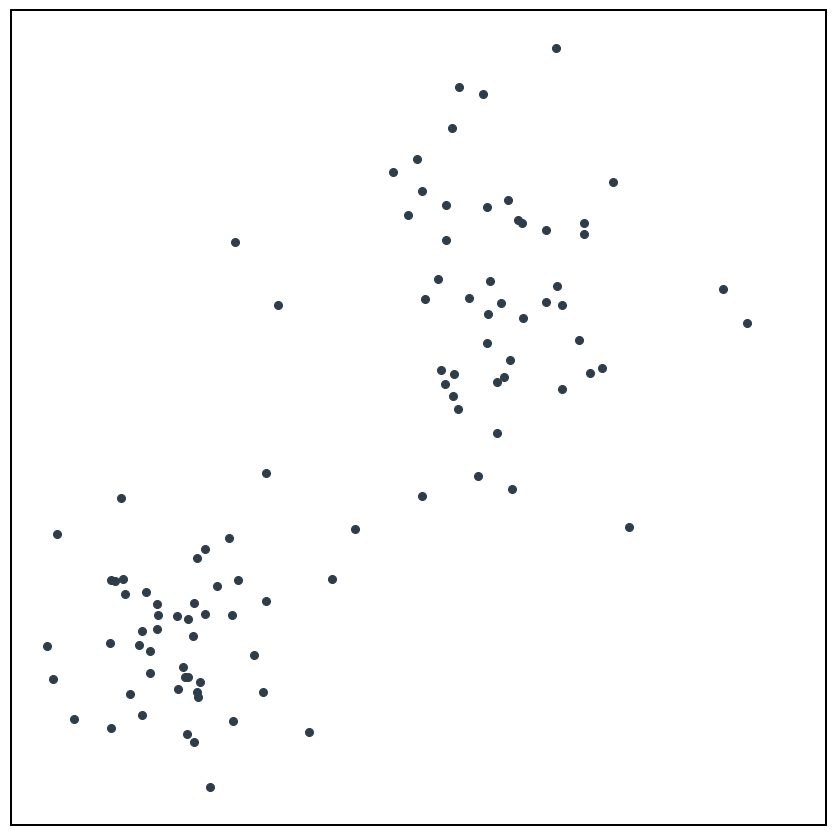

In [5]:
plt.figure(figsize = [15,15])

plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C03_TypesOfUL_01.png', transparent = True)

In [6]:
model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(X)

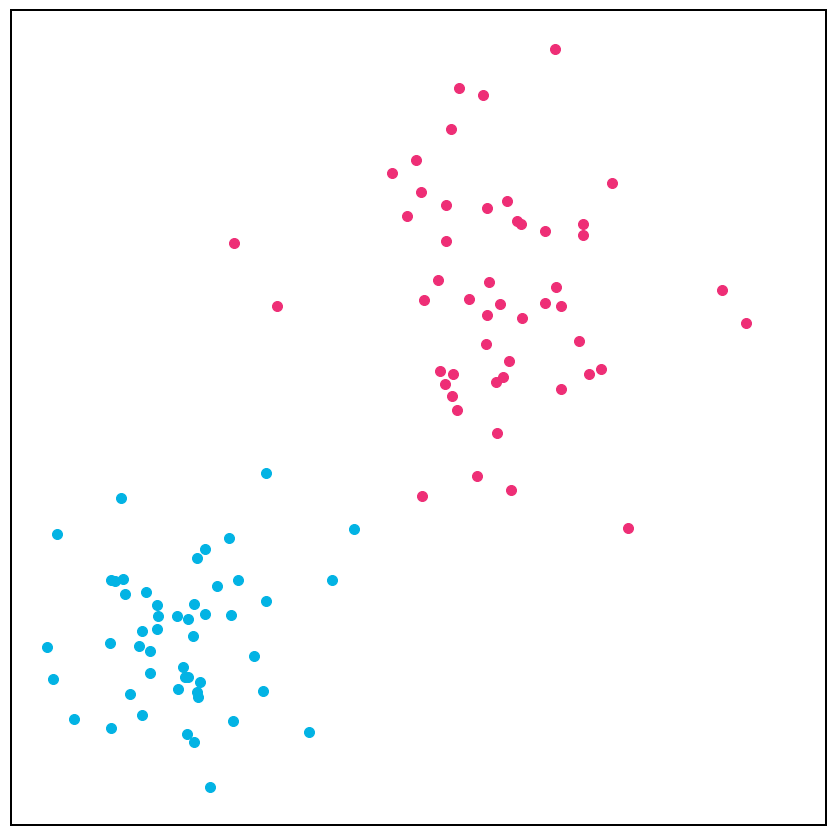

In [7]:
plt.figure(figsize = [15,15])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 100, c = col)

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C03_TypesOfUL_02.png', transparent = True)

In [8]:
n_clusters = 3
centers = [[-1,1],[-0.2,-1],[1,0.2]]
stdevs = [0.3, 0.4, 0.3]
X, y = make_blobs(centers = centers, cluster_std = stdevs, random_state = 400000)

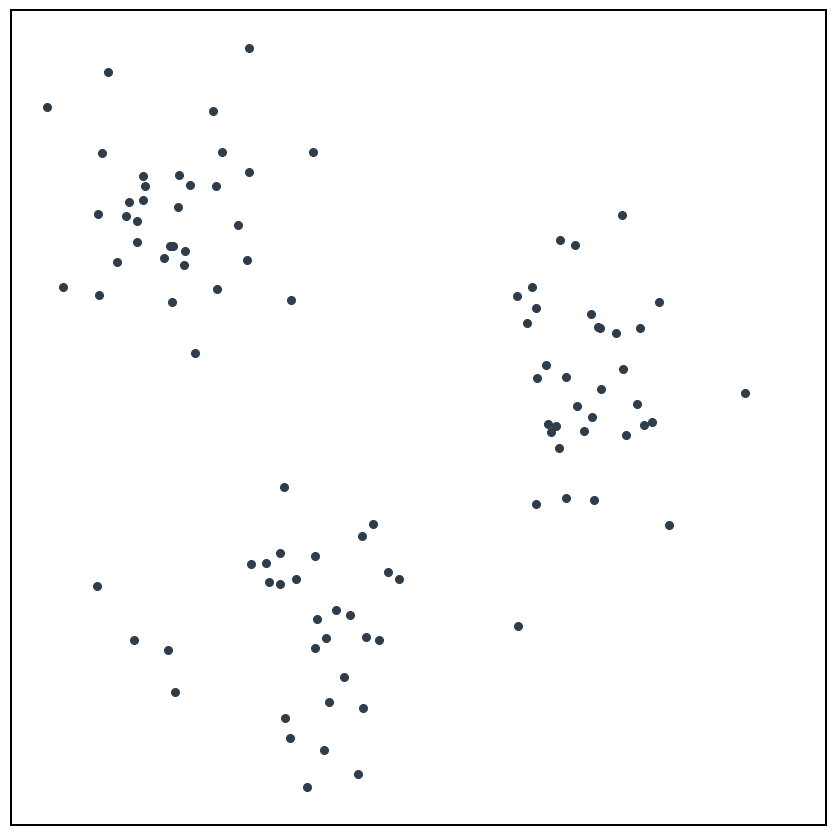

In [9]:
plt.figure(figsize = [15,15])

plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C03_TypesOfUL_03.png', transparent = True)

In [10]:
model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(X)

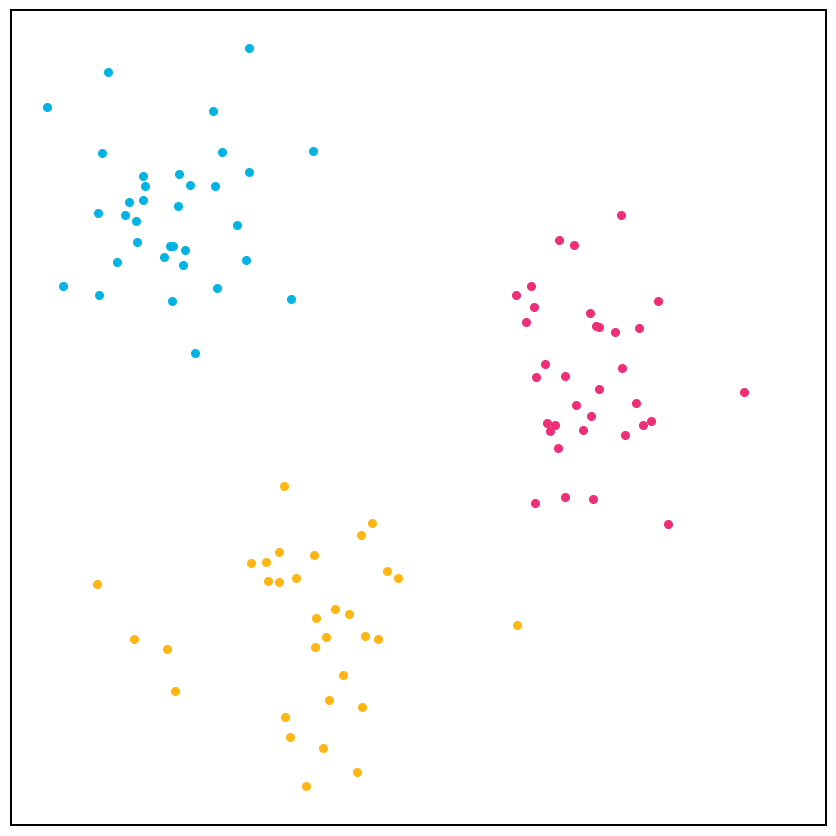

In [11]:
plt.figure(figsize = [15,15])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C03_TypesOfUL_04.png', transparent = True)

In [12]:
X_new = np.array([[0.85,1.2],[-1.0, -0.4]])

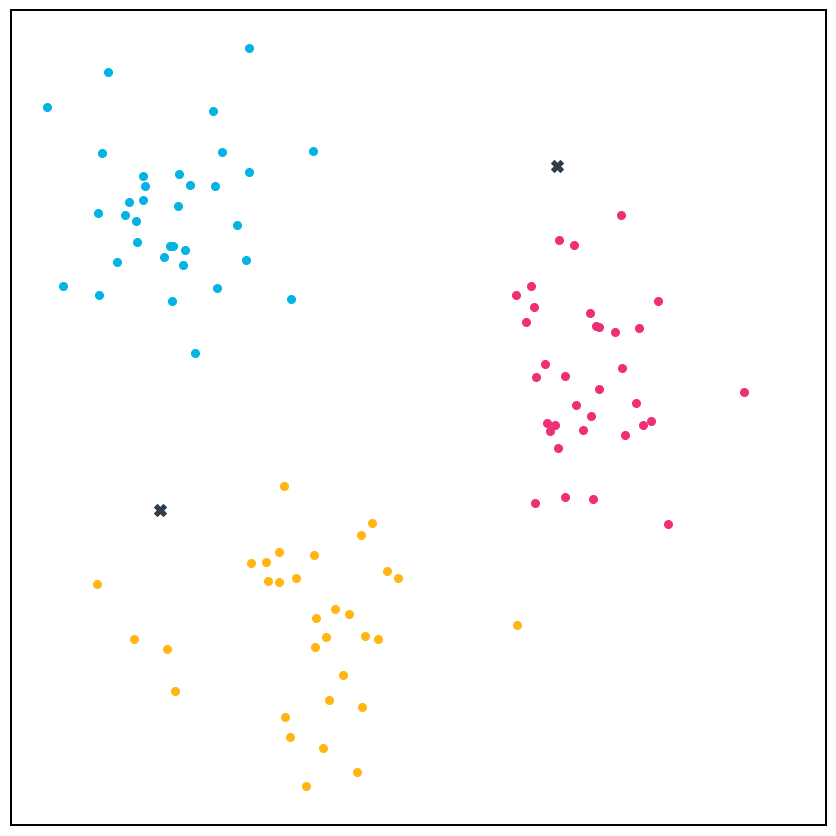

In [13]:
plt.figure(figsize = [15,15])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)
plt.scatter(X_new[:,0], X_new[:,1], s = 144, marker = 'X', c = plot_colors[-1])

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C03_TypesOfUL_05.png', transparent = True)

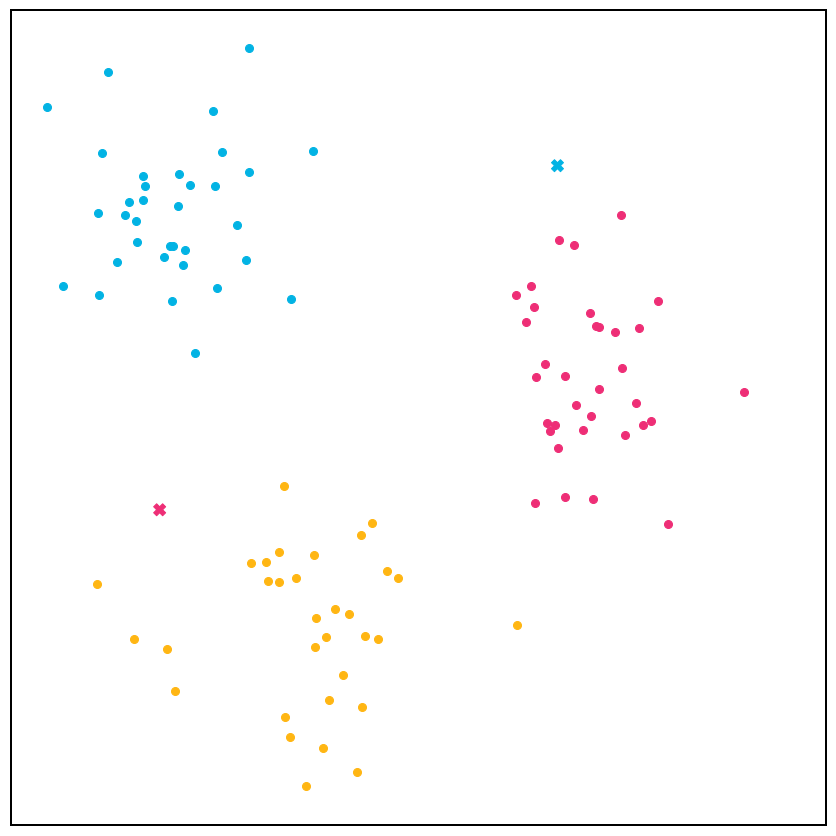

In [14]:
plt.figure(figsize = [15,15])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)
plt.scatter(X_new[:,0], X_new[:,1], s = 144, marker = 'X', c = plot_colors[:2])

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C03_TypesOfUL_06.png', transparent = True)

In [15]:
n_points = 40
X = np.random.RandomState(800000).multivariate_normal([0,0], [[1,0.8],[0.8,1]], n_points)

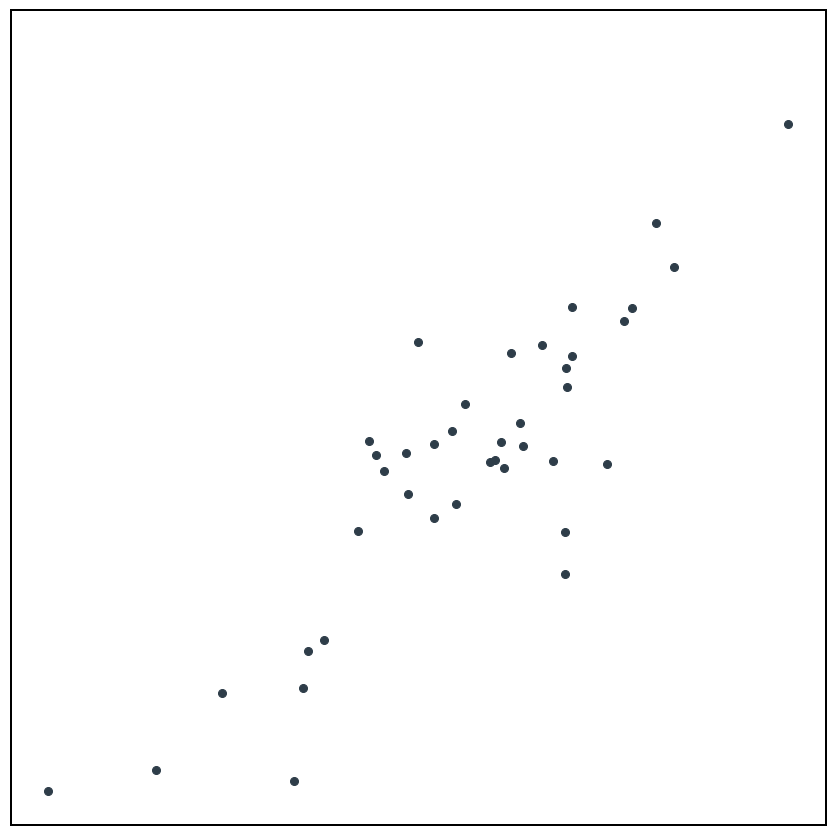

In [16]:
plt.figure(figsize = [15,15])

plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C03_TypesOfUL_07.png', transparent = True)

In [17]:
from sklearn.decomposition import PCA

model = PCA()
model.fit_transform(X)

pc1 = model.components_[0,:]
X_center = X.mean(axis=0)

In [18]:
X_new = np.matmul( np.dot(X - X_center, pc1).reshape(-1,1), pc1.reshape(1,-1) ) + X_center

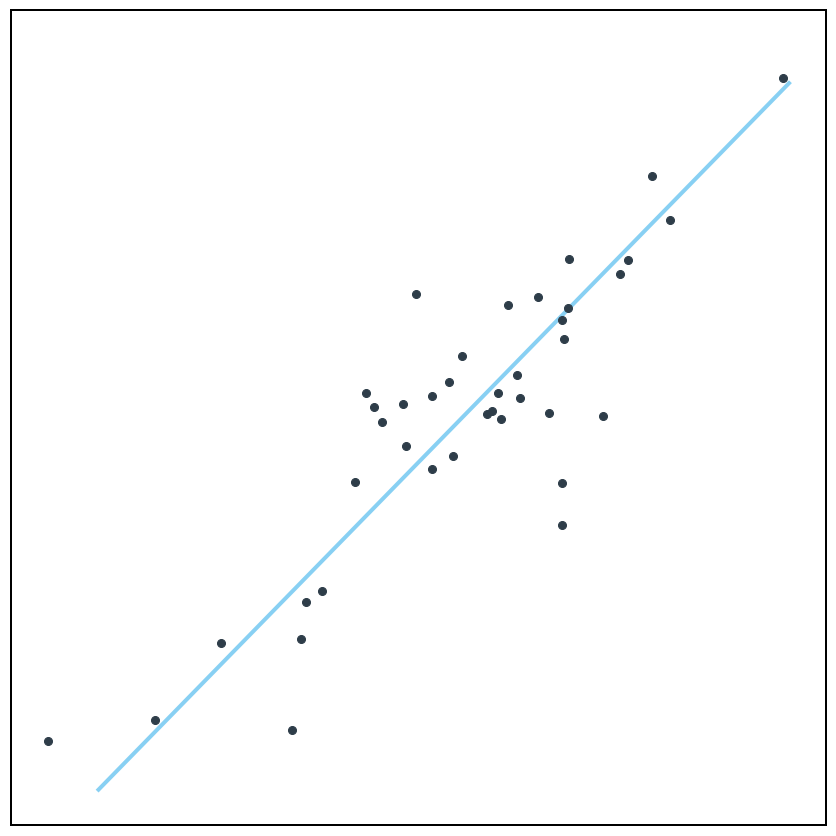

In [19]:
plt.figure(figsize = [15,15])

plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])
plt.plot([X_new[:,0].min(), X_new[:,0].max()],  [X_new[:,1].min(), X_new[:,1].max()],
         '-', c = plot_lcolors[0], lw = 4, zorder = 0)

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C03_TypesOfUL_08.png', transparent = True)

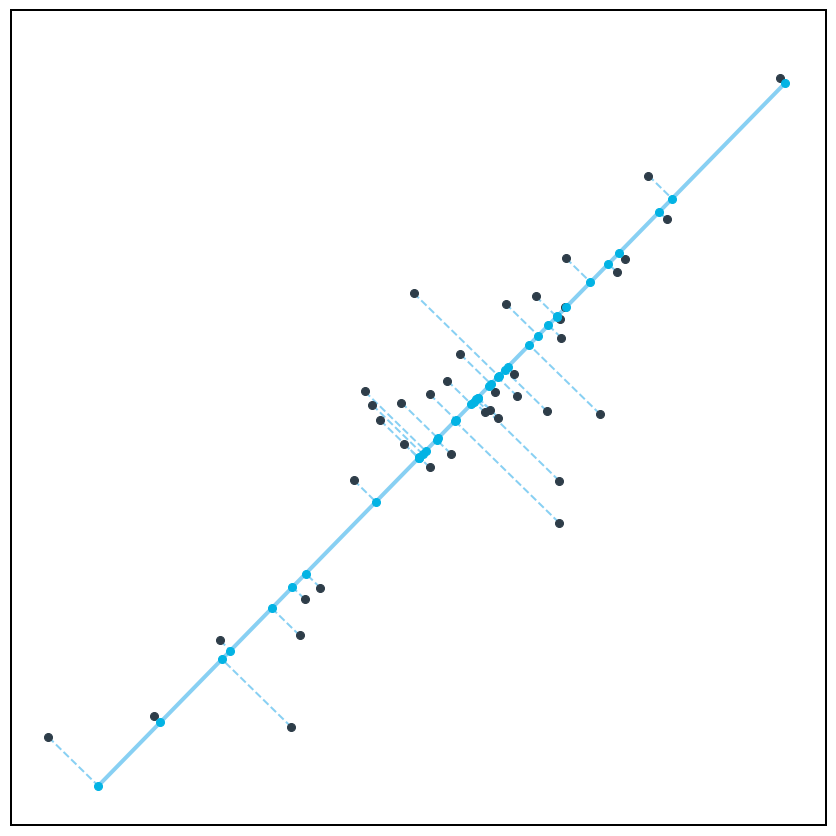

In [20]:
plt.figure(figsize = [15,15])

plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])
plt.plot([X_new[:,0].min(), X_new[:,0].max()],  [X_new[:,1].min(), X_new[:,1].max()],
         '-', c = plot_lcolors[0], lw = 4, zorder = 0)
plt.scatter(X_new[:,0], X_new[:,1], s = 64, c = plot_colors[0])
for x, x_new in zip(X, X_new):
    plt.plot([x[0],x_new[0]], [x[1],x_new[1]], '--', c = plot_lcolors[0], lw = 2, zorder = 0)

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C03_TypesOfUL_09.png', transparent = True)

## C1.05: k-means

In [21]:
work = np.random.RandomState(250000).multivariate_normal([-1,0], [[0.05,0],[0,0.7]], 40)
away = np.random.RandomState(350000).multivariate_normal([2,1.3], [[0.1,0],[0,0.2]], 10)
X = np.vstack([work, away])

In [22]:
# Tweaking the data for visibility!
X[ 8,0] += .1
X[14,1] += .1
X[17,1] -= .08
X[21,0] -= .05
X[22,0] -= .1
X[37,0] += .1
X[39,0] -= .05

X[45,1] += .08
X[46,1] -= .05
X[48,1] += .05

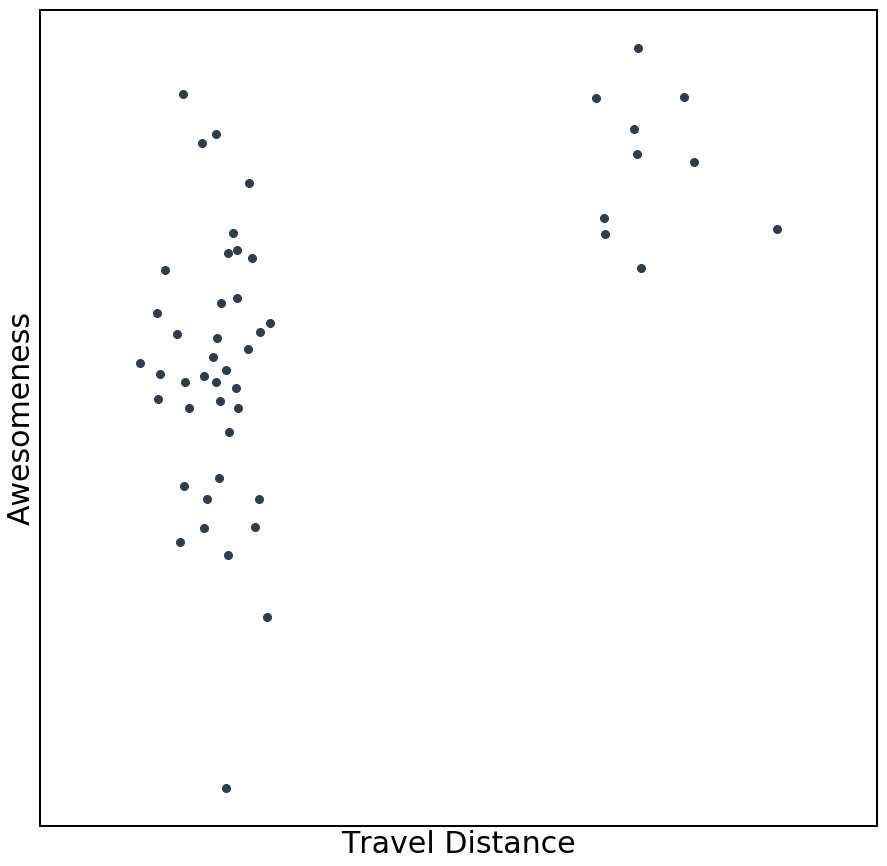

In [23]:
plt.figure(figsize = [15,15])

plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])
plt.xlabel('Travel Distance', size = 30)
plt.ylabel('Awesomeness', size = 30)

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('equal')
plt.savefig('C05_kmeans_00.png', transparent = True)

In [24]:
work_high = np.logical_and(X[:,0] < 0, X[:,1] > -0.5)
work_low  = np.logical_and(X[:,0] < 0, X[:,1] < -0.5)
away      = X[:,0] > 0

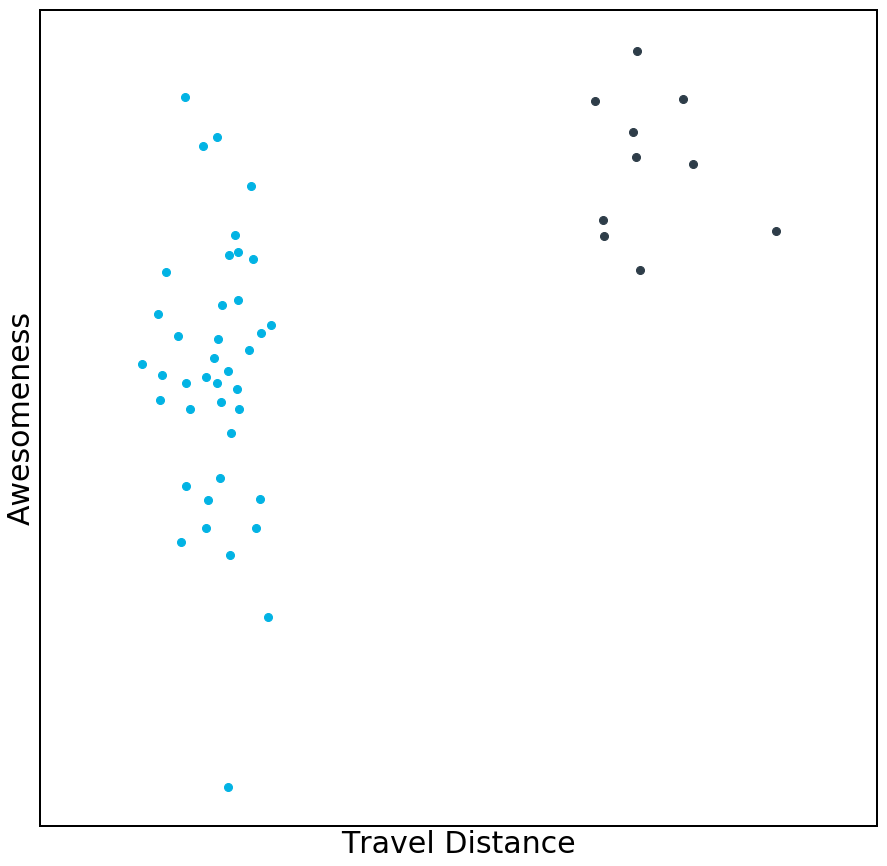

In [25]:
plt.figure(figsize = [15,15])

plt.scatter(X[work_high,0], X[work_high,1], s = 64, c = plot_colors[0])
plt.scatter(X[work_low,0], X[work_low,1], s = 64, c = plot_colors[0])
plt.scatter(X[away,0], X[away,1], s = 64, c = plot_colors[-1])

plt.xlabel('Travel Distance', size = 30)
plt.ylabel('Awesomeness', size = 30)

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('equal')
plt.savefig('C05_kmeans_01.png', transparent = True)

## C1.07: Changing k

In [26]:
n_clusters = 3
centers = [[-1,0],[0.9,-0.8],[0.4, 1]]
stdevs = [0.3, 0.3, 0.3]
X, y = make_blobs(centers = centers, cluster_std = stdevs, random_state = 1200000)

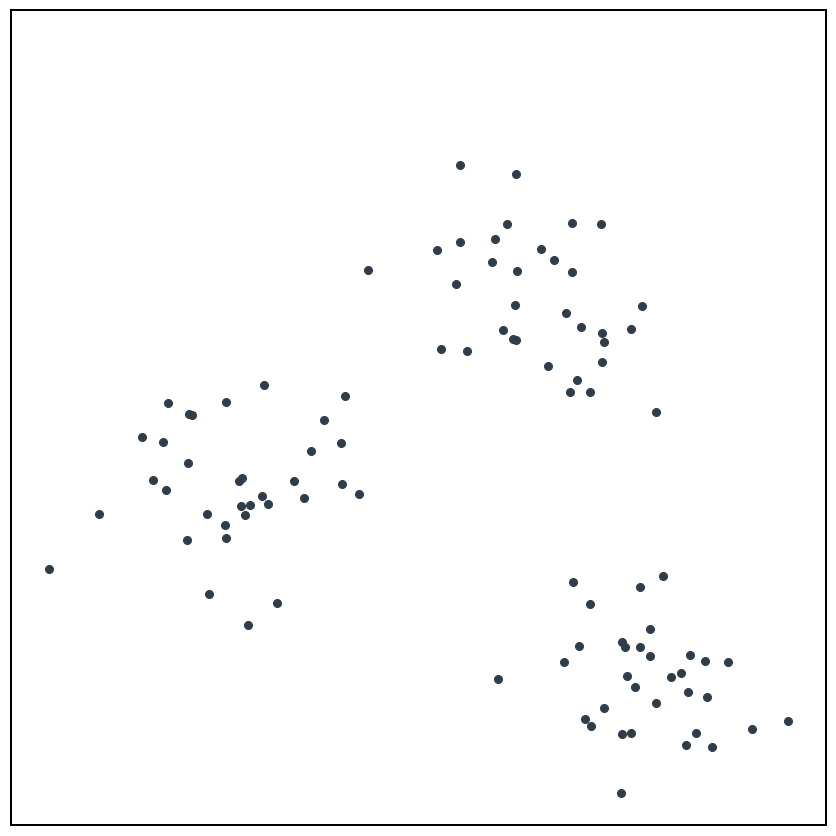

In [27]:
plt.figure(figsize = [15,15])

plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C07_ChangingK_01.png', transparent = True)

In [28]:
model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(X)

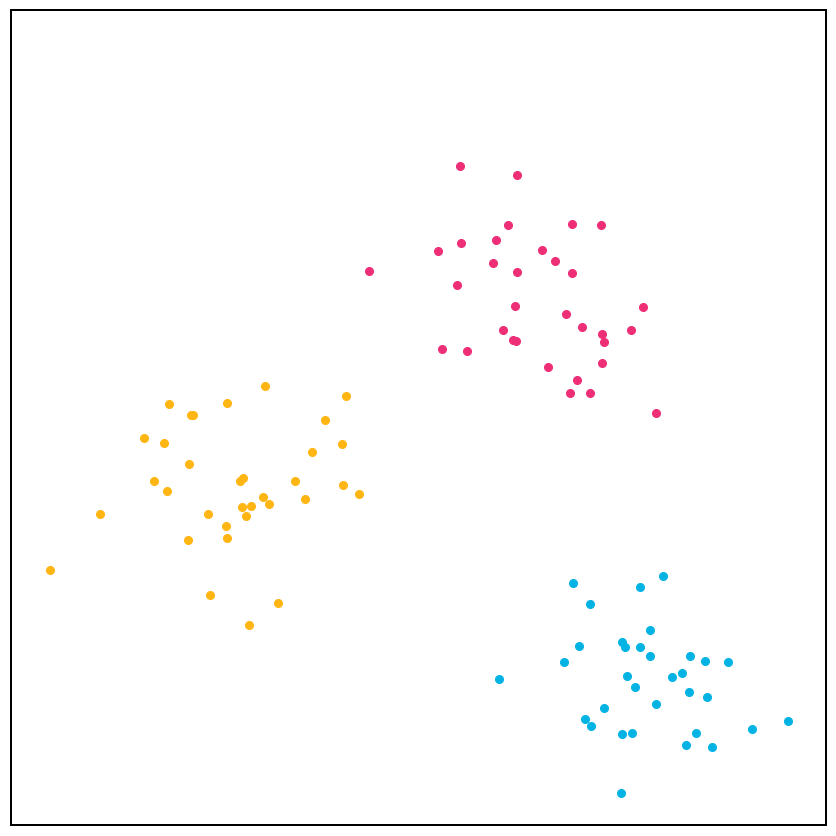

In [29]:
plt.figure(figsize = [15,15])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C07_ChangingK_02.png', transparent = True)

In [30]:
blob_1 = np.random.RandomState(230000).multivariate_normal([1.1,-1], [[0.15,0],[0,0.15]], 40)
blob_2 = np.random.RandomState(240000).multivariate_normal([-0.5,0.5], [[0.15,0],[0,0.15]], 60) + \
         np.tile(np.random.RandomState(250000).uniform(-0.8,0.8,60).reshape(-1,1), (1,2))
X = np.vstack([blob_1, blob_2])

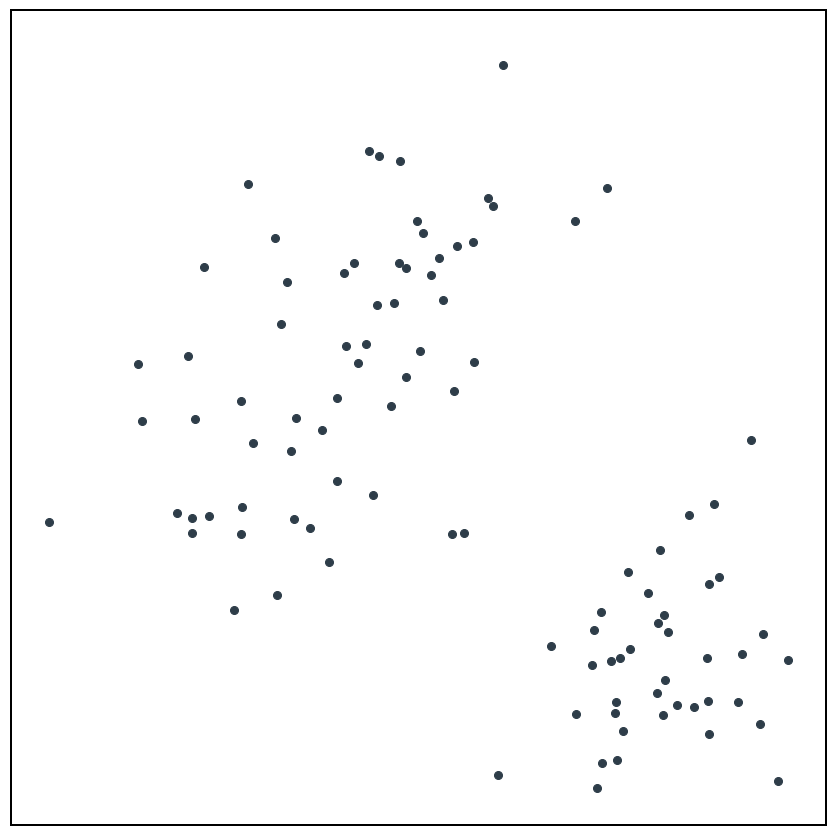

In [31]:
plt.figure(figsize = [15,15])

plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C07_ChangingK_03.png', transparent = True)

In [32]:
n_clusters = 3
model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(X)

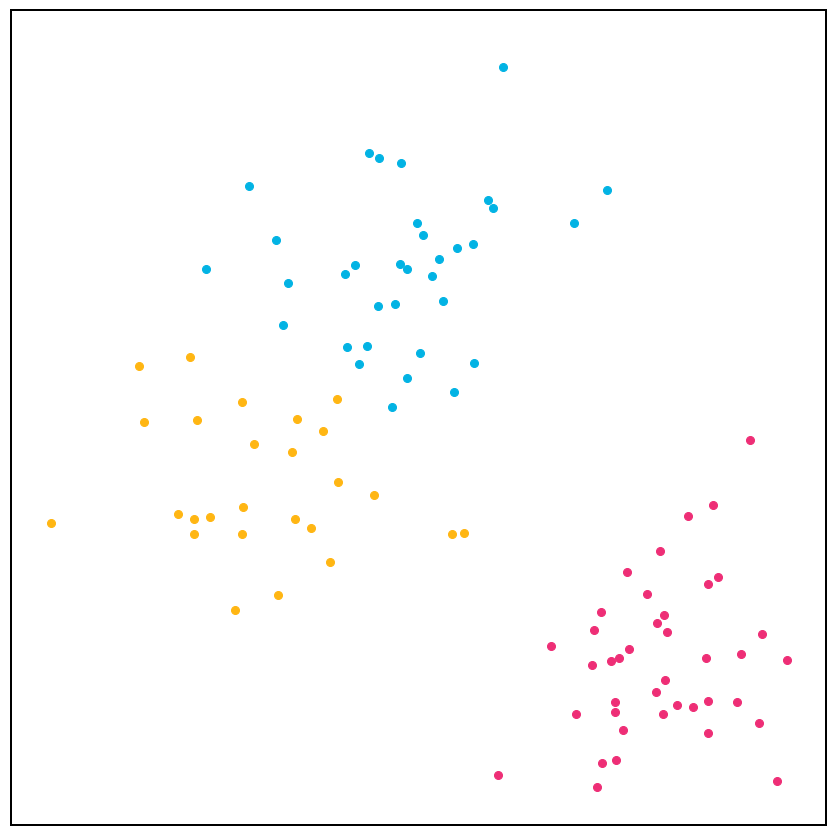

In [33]:
plt.figure(figsize = [15,15])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C07_ChangingK_04.png', transparent = True)

In [34]:
n_clusters = 2
model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(X)

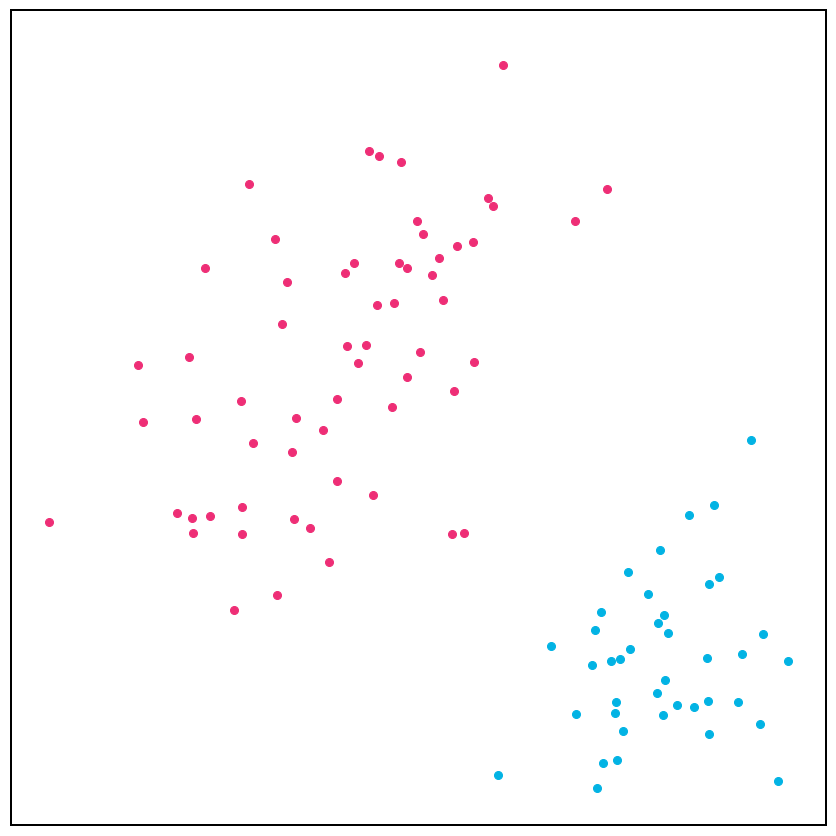

In [35]:
plt.figure(figsize = [15,15])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C07_ChangingK_05.png', transparent = True)

## C1.08: Elbow Method for Finding k

In [36]:
centers = [[-1,-1], [0.7,-0.7], [-0.7, 0.7], [1, 1]]
stdevs = [0.3, 0.3, 0.3, 0.3]
X, y = make_blobs(centers = centers, cluster_std = stdevs, random_state = 2400000)

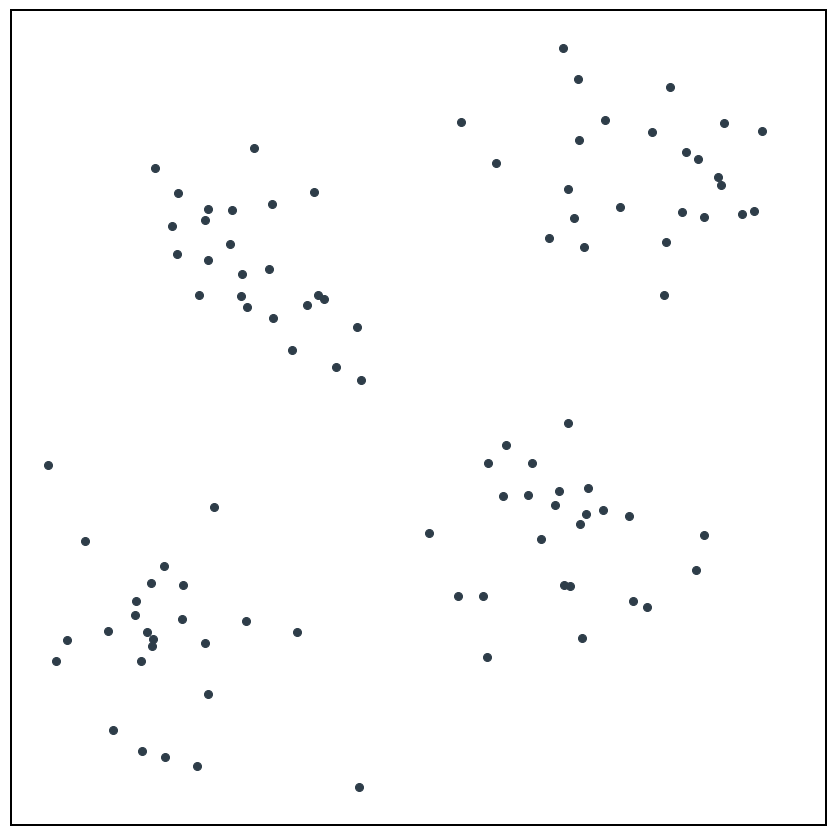

In [37]:
plt.figure(figsize = [15,15])

plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C08_ElbowMethod_01.png', transparent = True)

In [38]:
n_clusters = 1
model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(X)

In [39]:
dist = 0
for x, pred in zip(X, preds):
    dist += np.sqrt(((x - model.cluster_centers_[pred]) ** 2).sum())
dist /= X.shape[0]
print(dist)

1.2608214067868824


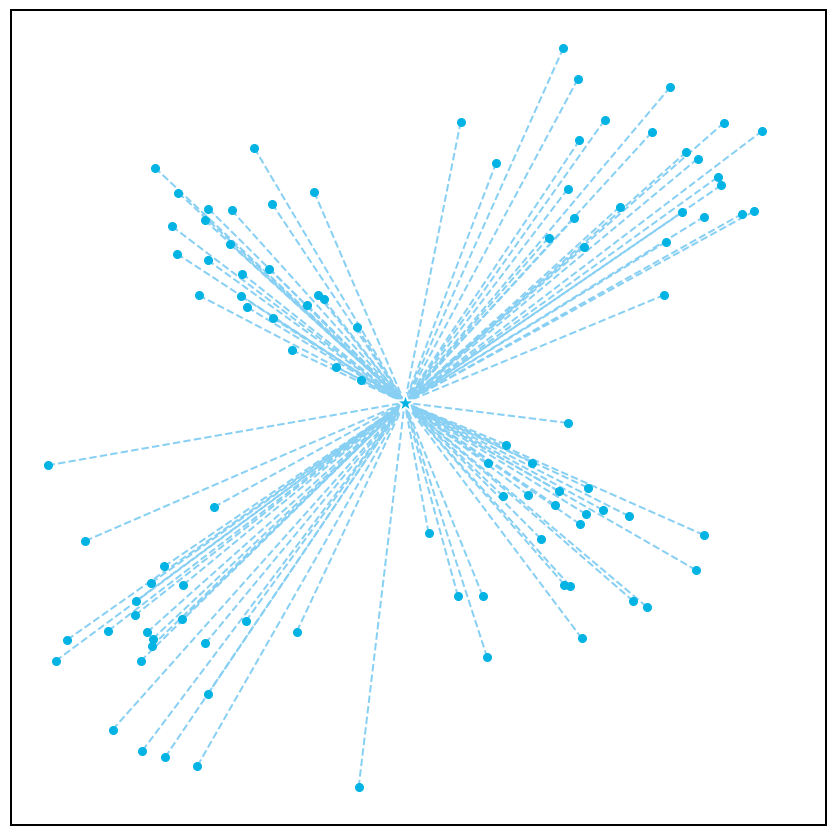

In [40]:
plt.figure(figsize = [15,15])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    cluster_center = model.cluster_centers_[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)
    plt.scatter(cluster_center[0], cluster_center[1], marker = '*', s = 400,
                c = col, lw = 2, edgecolors = 'w')
    for x in X[my_members]:
        plt.plot([x[0],cluster_center[0]], [x[1],cluster_center[1]], '--',
                 c = plot_lcolors[k], lw = 2, zorder = 0)

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C08_ElbowMethod_02.png', transparent = True)

In [41]:
n_clusters = 2
model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(X)

In [42]:
dist = 0
for x, pred in zip(X, preds):
    dist += np.sqrt(((x - model.cluster_centers_[pred]) ** 2).sum())
dist /= X.shape[0]
print(dist)

0.9228136444927394


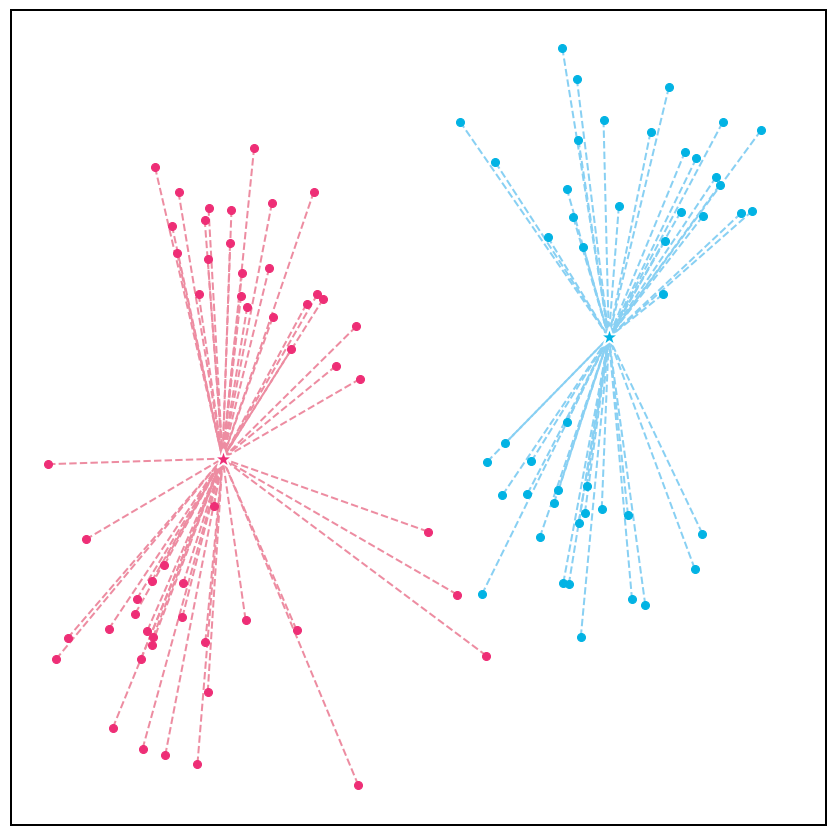

In [43]:
plt.figure(figsize = [15,15])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    cluster_center = model.cluster_centers_[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)
    plt.scatter(cluster_center[0], cluster_center[1], marker = '*', s = 400,
                c = col, lw = 2, edgecolors = 'w')
    for x in X[my_members]:
        plt.plot([x[0],cluster_center[0]], [x[1],cluster_center[1]], '--',
                 c = plot_lcolors[k], lw = 2, zorder = 0)

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C08_ElbowMethod_03.png', transparent = True)

In [44]:
n_clusters = 3
model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(X)

In [45]:
dist = 0
for x, pred in zip(X, preds):
    dist += np.sqrt(((x - model.cluster_centers_[pred]) ** 2).sum())
dist /= X.shape[0]
print(dist)

0.6486863274260817


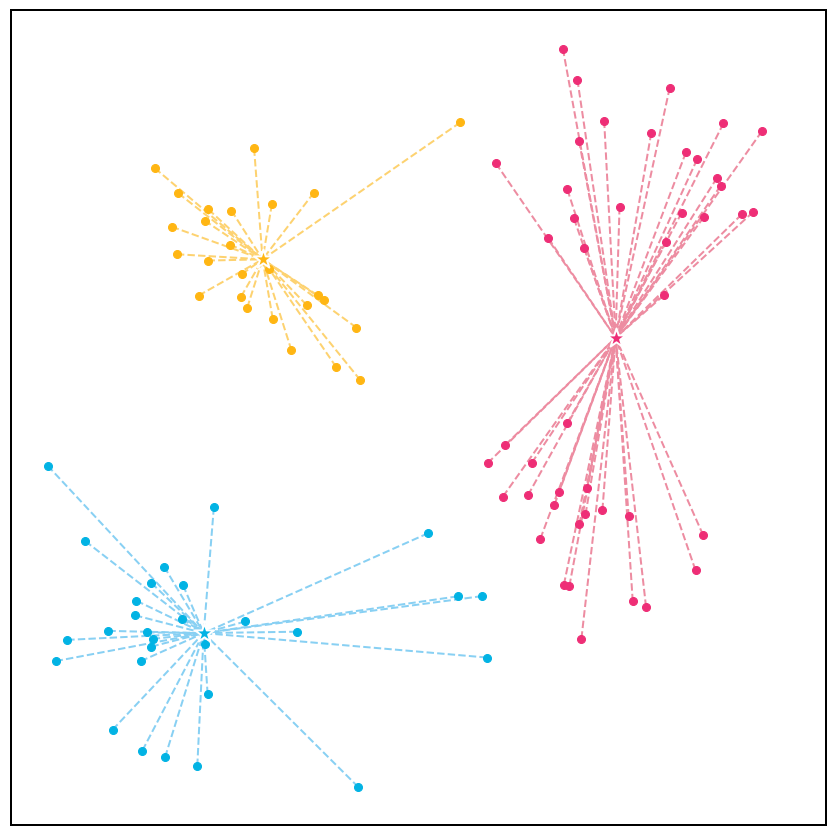

In [46]:
plt.figure(figsize = [15,15])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    cluster_center = model.cluster_centers_[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)
    plt.scatter(cluster_center[0], cluster_center[1], marker = '*', s = 400,
                c = col, lw = 2, edgecolors = 'w')
    for x in X[my_members]:
        plt.plot([x[0],cluster_center[0]], [x[1],cluster_center[1]], '--',
                 c = plot_lcolors[k], lw = 2, zorder = 0)

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C08_ElbowMethod_04.png', transparent = True)

In [47]:
distances = []
for n in range(1,8):
    n_clusters = n
    model = KMeans(n_clusters = n_clusters)
    preds = model.fit_predict(X)

    dist = 0
    for x, pred in zip(X, preds):
        dist += np.sqrt(((x - model.cluster_centers_[pred]) ** 2).sum())
    dist /= X.shape[0]
    distances.append(dist)

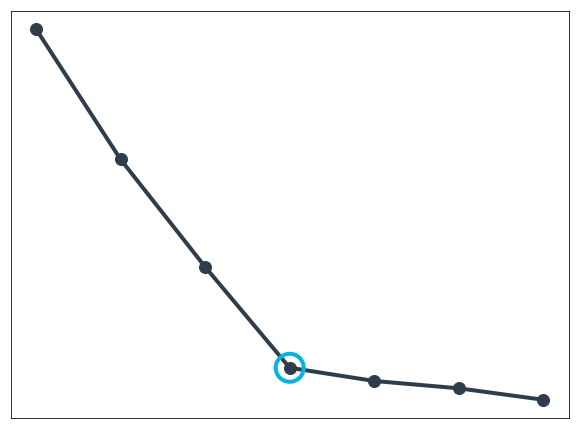

In [48]:
plt.figure(figsize = [10,7.5])

plt.plot(range(1,8), distances, lw = 4, marker = 'o', ms = 12, c = plot_colors[-1])
plt.scatter(4, distances[3], s = 28 ** 2, lw = 4, edgecolors = plot_colors[0], facecolors = 'none', zorder = 3)

# plt.xlabel('# clusters (k)', fontsize = 30)
# plt.xticks(range(1,8), fontsize = 30)
# plt.ylabel('Avg. distance to cluster center', fontsize = 30)
# plt.yticks(np.arange(0.3,1.4,0.2), fontsize = 30)
# ax = plt.gca()
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
[side.set_linewidth(2) for side in ax.spines.values()]
# ax.tick_params(width = 2)
plt.xticks([])
plt.yticks([])
plt.savefig('C08_ElbowMethod_06a.png', transparent = True)

In [48]:
n_clusters = 4
model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(X)

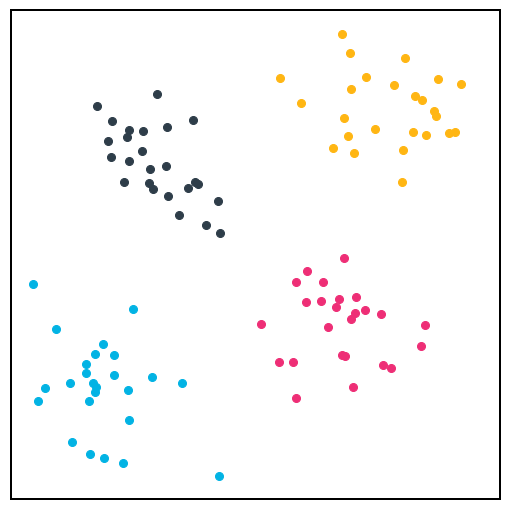

In [49]:
plt.figure(figsize = [9,9])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    cluster_center = model.cluster_centers_[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)
    # plt.scatter(cluster_center[0], cluster_center[1], marker = '*', s = 400,
    #             c = col, lw = 2, edgecolors = 'w')

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C08_ElbowMethod_07.png', transparent = True)

## C1.13: How Does k-means Work?

In [50]:
n_clusters = 3
centers = [[-1,0.7], [-0.5,-0.6], [1, 0]]
stdevs = [0.3, 0.3, 0.3]
X, y = make_blobs(centers = centers, cluster_std = stdevs, random_state = 3600000)

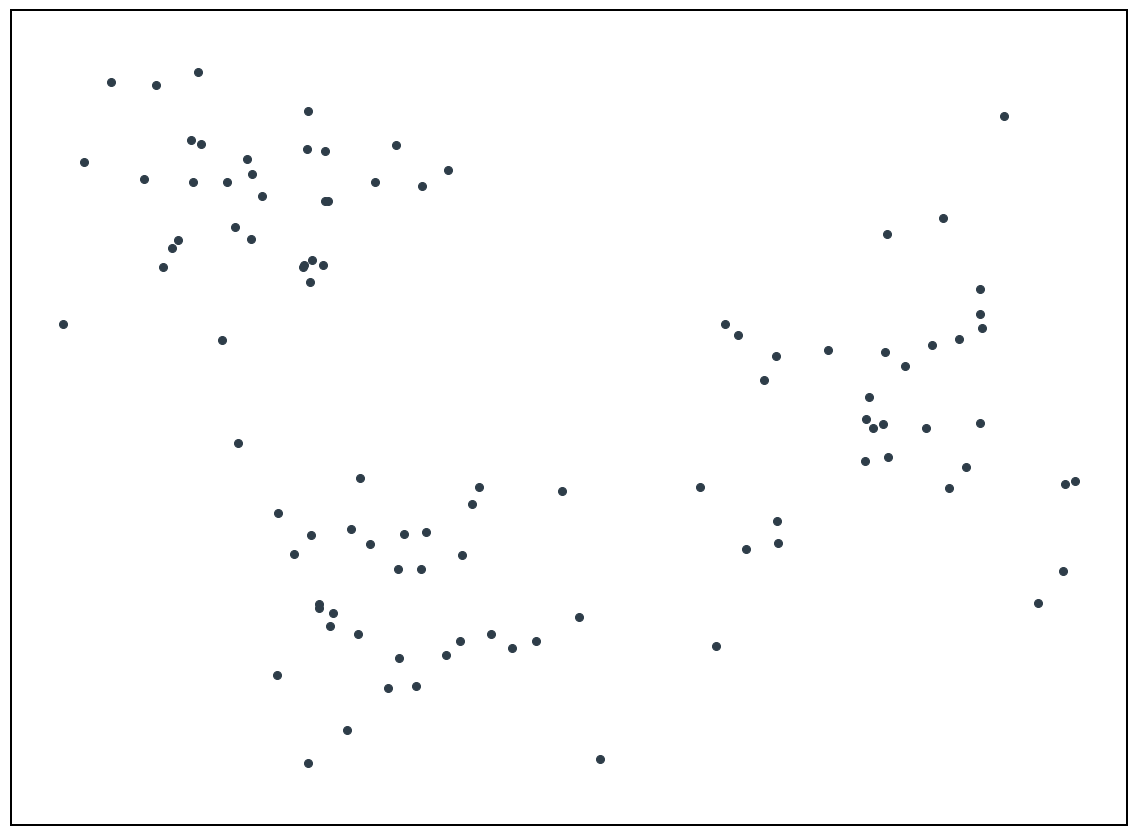

In [51]:
plt.figure(figsize = [20,15])

plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('equal')
plt.savefig('C13_HowKMeansWorks_01.png', transparent = True)

In [52]:
def predict_cluster(X, centroids):
    preds = []
    for x in X:
        preds.append(((x - centroids) ** 2).sum(axis=1).argmin())
    return np.array(preds)

In [53]:
centroids = [[-0.3, 0.9], [0.7, -0.7], [0.8, 0.8]]
preds = predict_cluster(X, centroids)

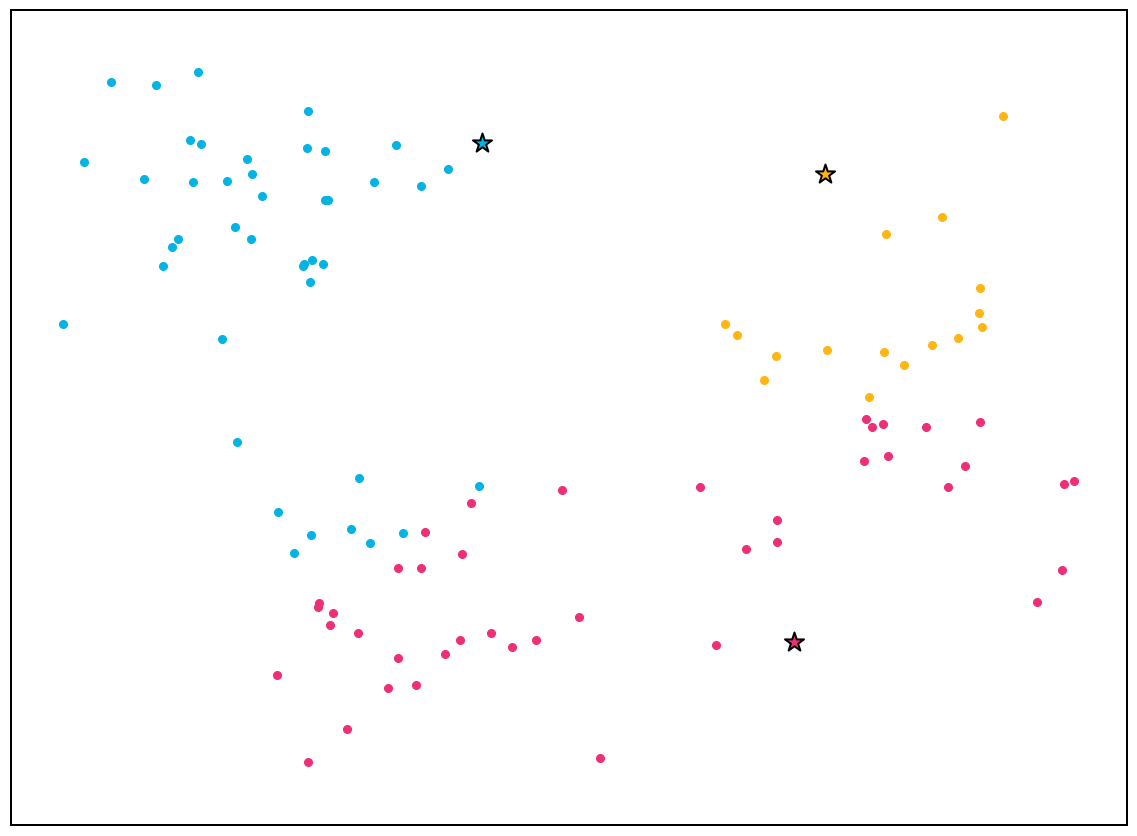

In [55]:
plt.figure(figsize = [20,15])

# plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    cluster_center = centroids[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)
    plt.scatter(cluster_center[0], cluster_center[1], marker = '*', s = 400,
                c = col, lw = 2, edgecolors = 'k')

plt.xticks([])
plt.yticks([])
plt.grid()
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('equal')
plt.savefig('C13_HowKMeansWorks_03.png', transparent = True)

In [54]:
def new_centers(X, preds):
    centroids = []
    for k in np.unique(preds):
        my_members = (preds == k)
        centroids.append(X[my_members,:].mean(axis=0))
    return np.array(centroids)

In [55]:
new_centroids = new_centers(X, preds)

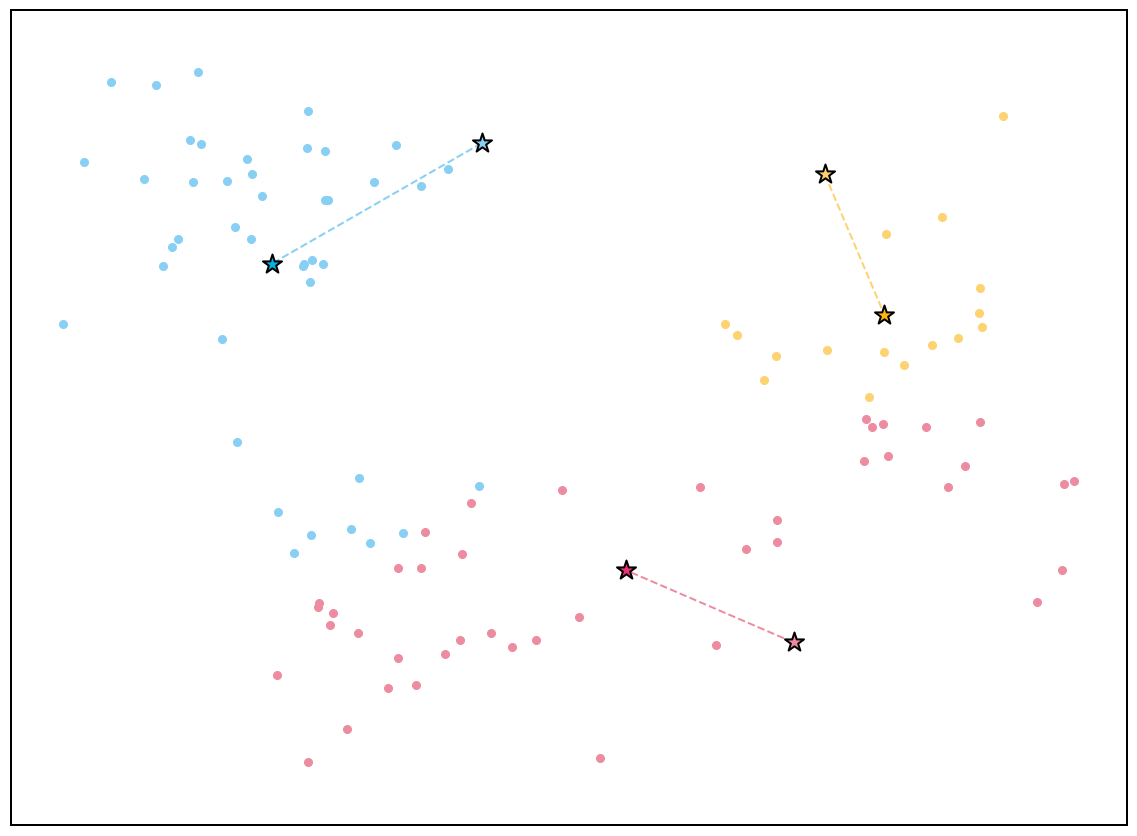

In [56]:
plt.figure(figsize = [20,15])

# plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

for k in range(n_clusters):
    my_members = (preds == k)
    old_center = centroids[k]
    new_center = new_centroids[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = plot_lcolors[k])
    plt.scatter(old_center[0], old_center[1], marker = '*', s = 400,
                c = plot_lcolors[k], lw = 2, edgecolors = 'k')
    plt.scatter(new_center[0], new_center[1], marker = '*', s = 400,
                c = plot_colors[k], lw = 2, edgecolors = 'k')
    plt.plot([old_center[0],new_center[0]], [old_center[1],new_center[1]], '--',
                 c = plot_lcolors[k], lw = 2, zorder = 0)

plt.xticks([])
plt.yticks([])
plt.grid()
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('equal')
plt.savefig('C13_HowKMeansWorks_04.png', transparent = True)

In [57]:
centroids = new_centroids
preds = predict_cluster(X, centroids)

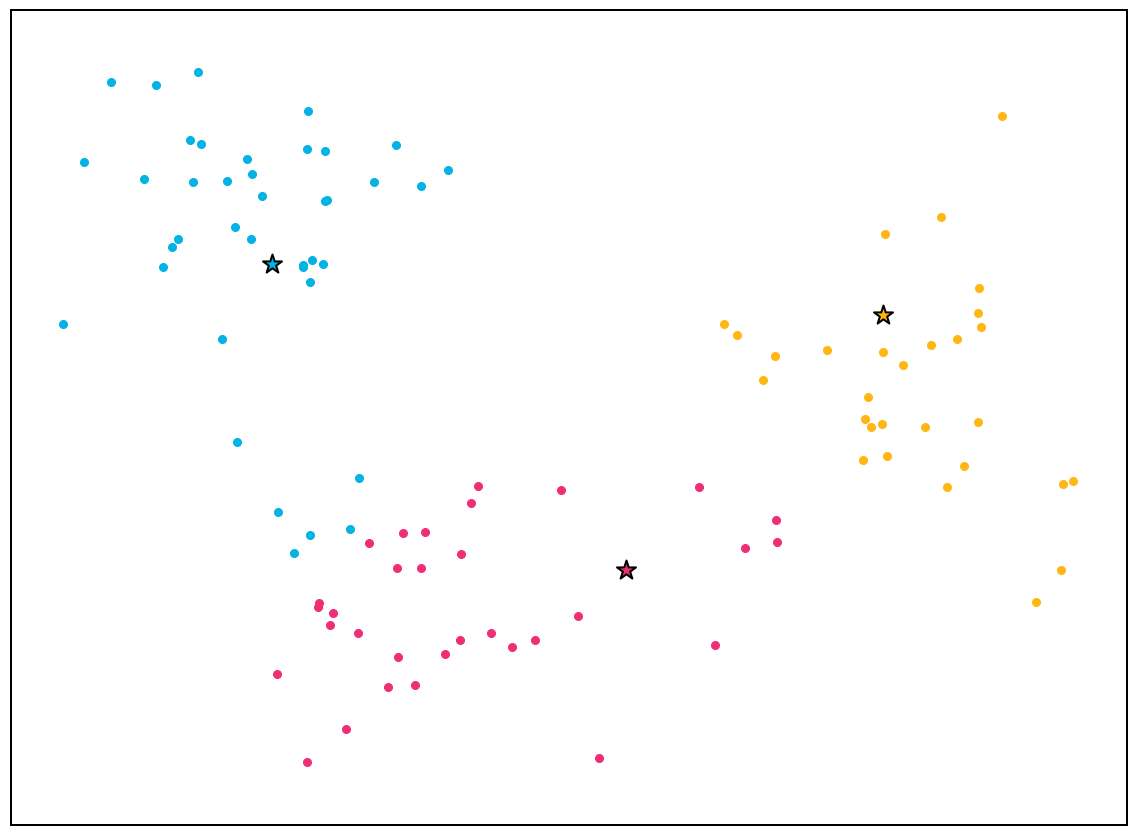

In [60]:
plt.figure(figsize = [20,15])

# plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    cluster_center = centroids[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)
    plt.scatter(cluster_center[0], cluster_center[1], marker = '*', s = 400,
                c = col, lw = 2, edgecolors = 'k')

plt.xticks([])
plt.yticks([])
plt.grid()
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('equal')
plt.savefig('C13_HowKMeansWorks_05.png', transparent = True)

In [58]:
new_centroids = new_centers(X, preds)
centroids = new_centroids
preds = predict_cluster(X, centroids)

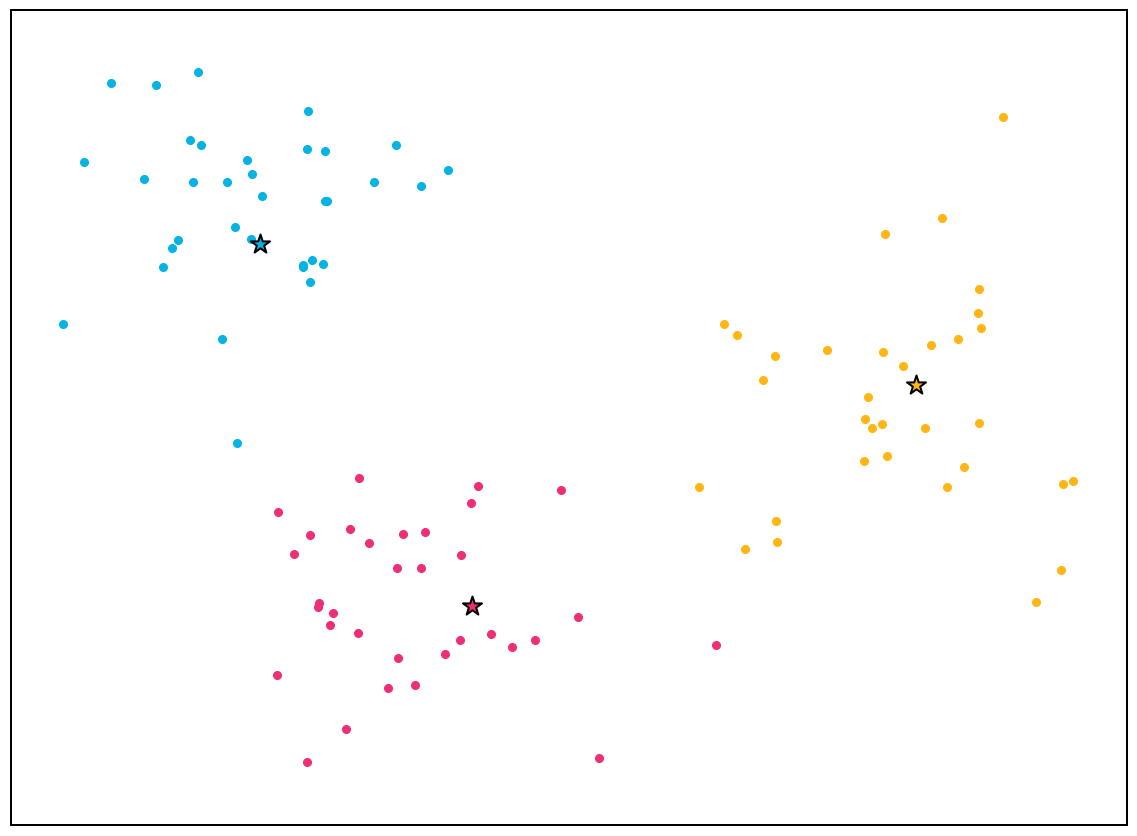

In [62]:
plt.figure(figsize = [20,15])

# plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    cluster_center = centroids[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)
    plt.scatter(cluster_center[0], cluster_center[1], marker = '*', s = 400,
                c = col, lw = 2, edgecolors = 'k')

plt.xticks([])
plt.yticks([])
plt.grid()
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('equal')
plt.savefig('C13_HowKMeansWorks_07.png', transparent = True)

In [59]:
new_centroids = new_centers(X, preds)
centroids = new_centroids
preds = predict_cluster(X, centroids)

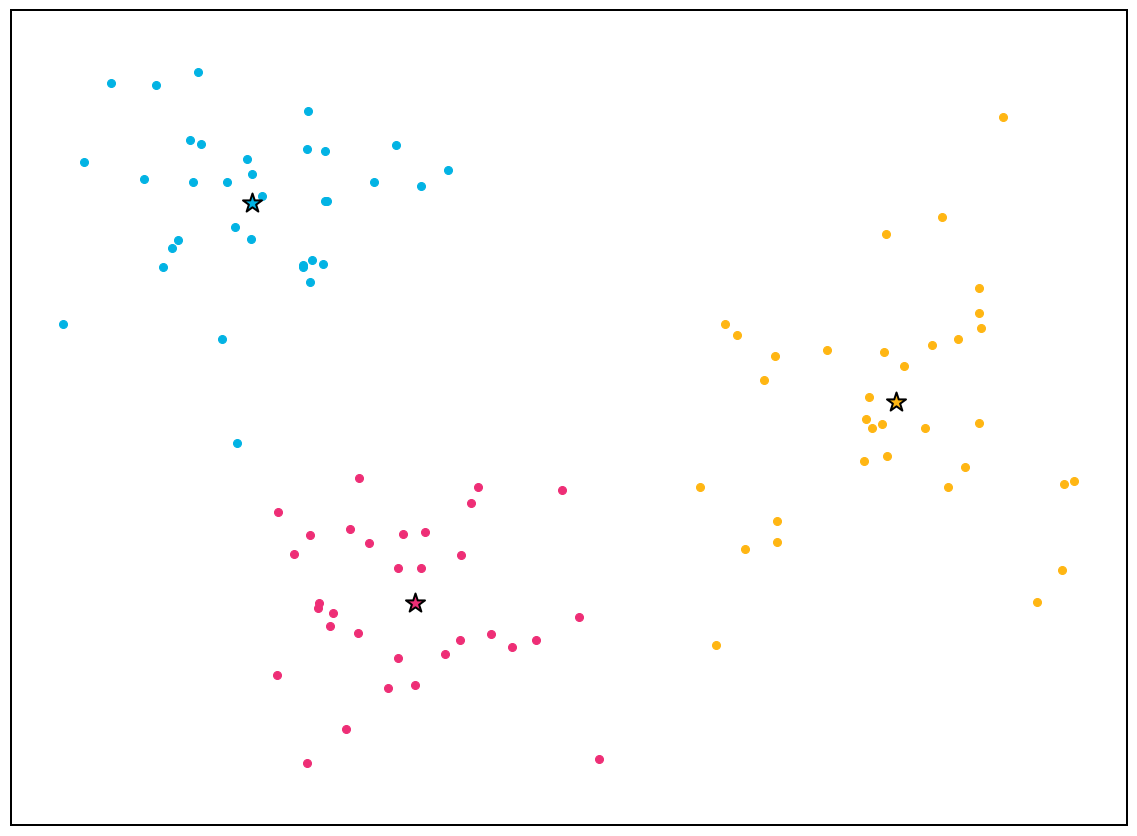

In [64]:
plt.figure(figsize = [20,15])

# plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    cluster_center = centroids[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)
    plt.scatter(cluster_center[0], cluster_center[1], marker = '*', s = 400,
                c = col, lw = 2, edgecolors = 'k')

plt.xticks([])
plt.yticks([])
plt.grid()
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('equal')
plt.savefig('C13_HowKMeansWorks_08.png', transparent = True)

In [60]:
new_centroids = new_centers(X, preds)
centroids = new_centroids
preds = predict_cluster(X, centroids)

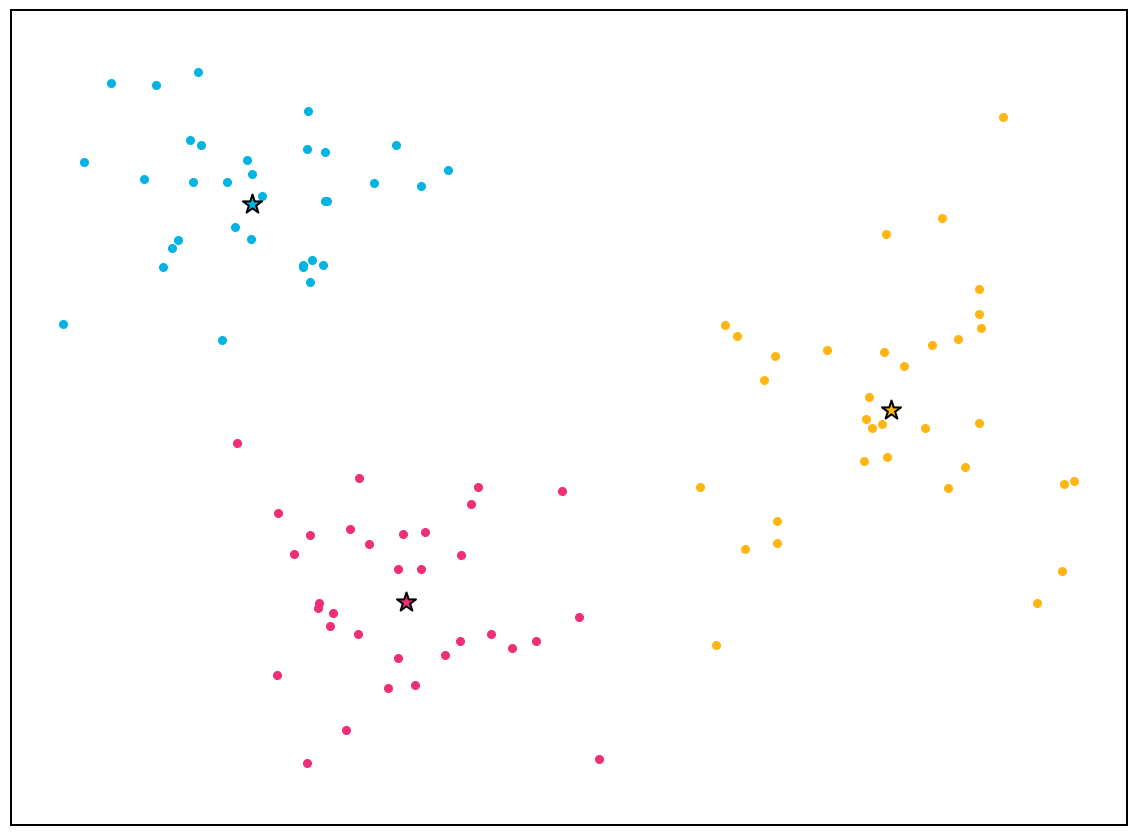

In [66]:
plt.figure(figsize = [20,15])

# plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    cluster_center = centroids[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)
    plt.scatter(cluster_center[0], cluster_center[1], marker = '*', s = 400,
                c = col, lw = 2, edgecolors = 'k')

plt.xticks([])
plt.yticks([])
plt.grid()
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('equal')
plt.savefig('C13_HowKMeansWorks_09.png', transparent = True)

## C1.16: Is That the Optimal Solution?

In [61]:
start_centroids = np.array([[-.7, 0.3],[1, 0],[1, 0.5]])
model = KMeans(n_clusters = n_clusters, init = start_centroids, n_init = 1)
preds = model.fit_predict(X)

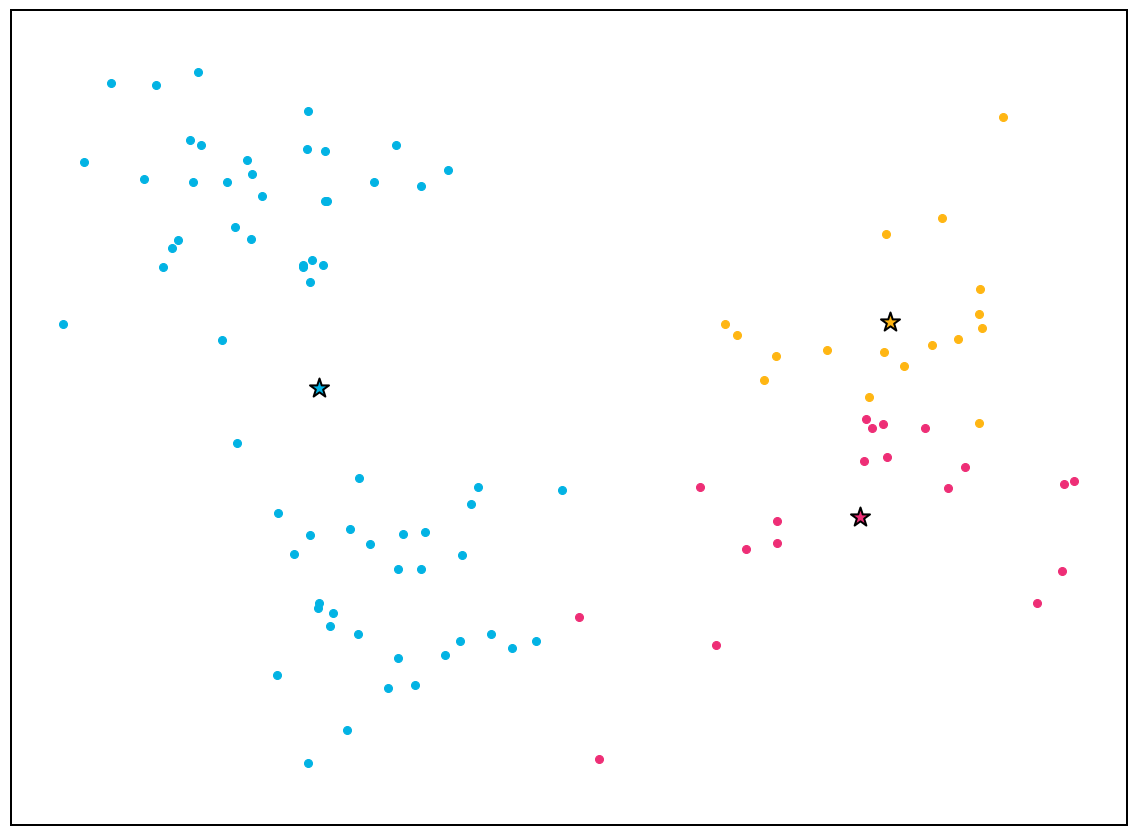

In [62]:
plt.figure(figsize = [20,15])

# plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    cluster_center = model.cluster_centers_[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)
    plt.scatter(cluster_center[0], cluster_center[1], marker = '*', s = 400,
                c = col, lw = 2, edgecolors = 'k')

plt.xticks([])
plt.yticks([])
# plt.grid()
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('equal')
plt.savefig('C16_IsThatOptimal_01.png', transparent = True)

In [63]:
all_starts = {'a': np.array([[-0.3, 0.9], [ 0.7, -0.7], [0.8, 0.8]]),
              'b': np.array([[ 0.2, 0.8], [-0.6,-0.7], [0.9,-0.3]]),
              'c': np.array([[-0.8, 0.8], [-0.1,  0.2], [0.4,-0.7]]),
              'd': np.array([[-0.7, 0.3], [ 1.1, -0.2], [1.0, 0.7]])}

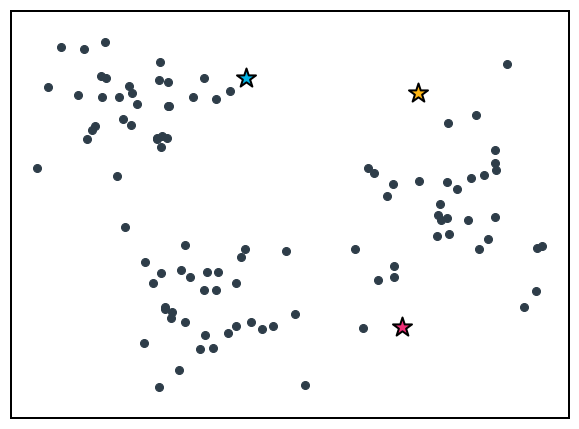

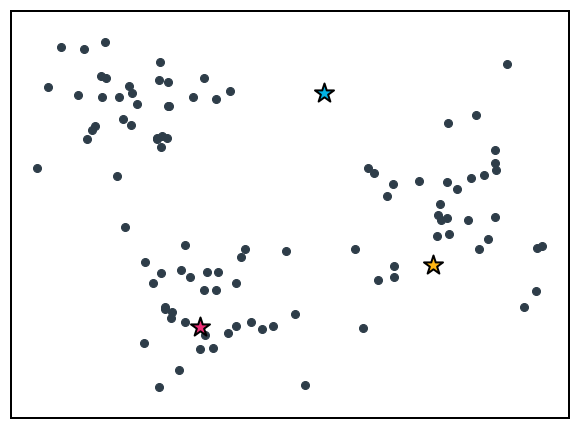

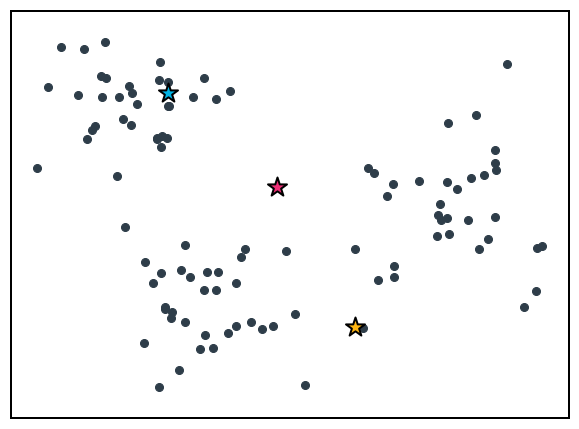

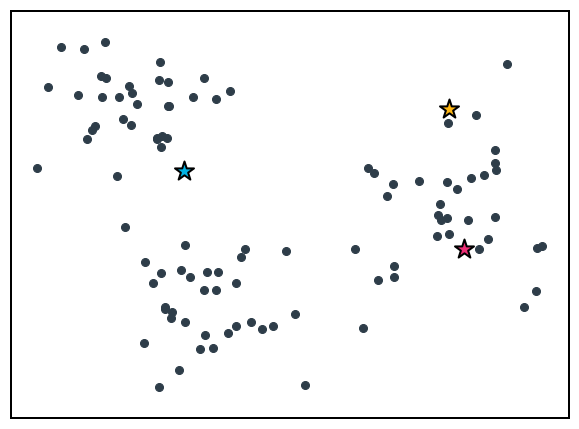

In [64]:
for key in all_starts:
    centroids = all_starts[key]
    
    plt.figure(figsize = [10,7.5])

    plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

    for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
        my_members = (preds == k)
        cluster_center = centroids[k]
        # plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)
        plt.scatter(cluster_center[0], cluster_center[1], marker = '*', s = 400,
                   c = col, lw = 2, edgecolors = 'k')

    plt.xticks([])
    plt.yticks([])
    plt.grid()
    ax = plt.gca()
    [side.set_linewidth(2) for side in ax.spines.values()]
    plt.axis('equal')
    plt.savefig('C16_IsThatOptimal_02{}.png'.format(key), transparent = True)

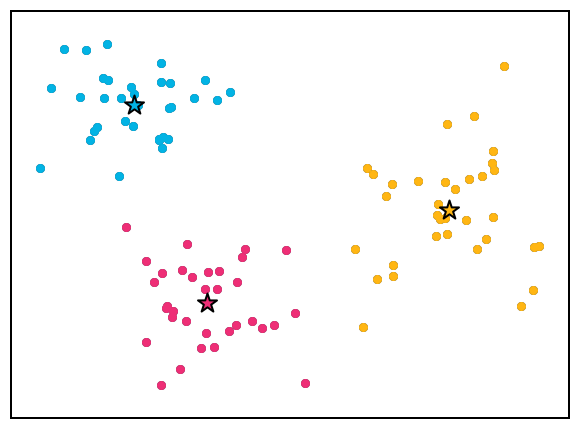

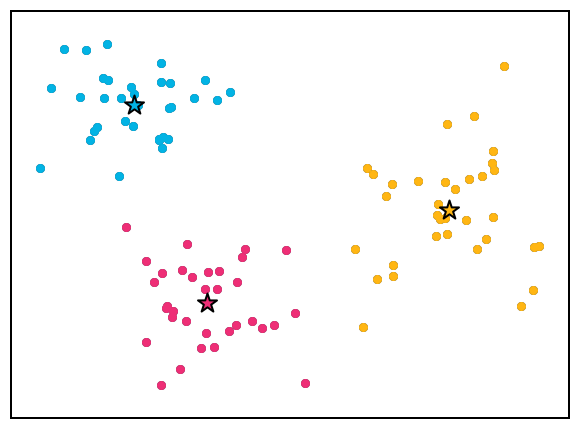

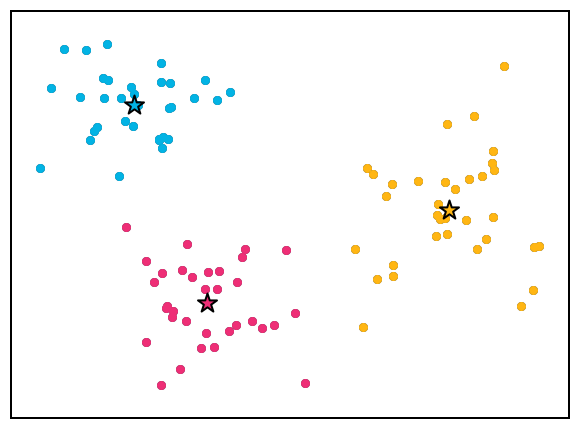

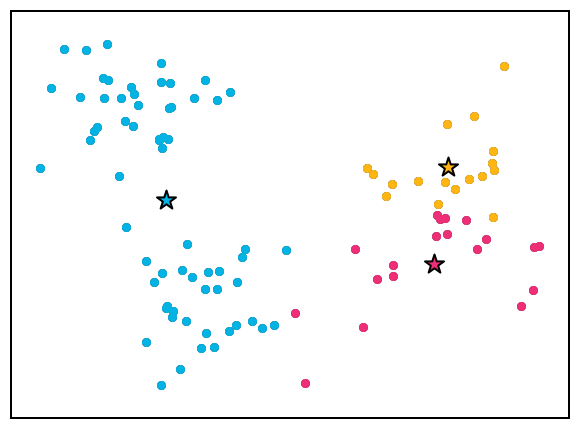

In [65]:
for key in all_starts:
    # get initial centers, run the model
    centroids = all_starts[key]
    model = KMeans(n_clusters = n_clusters, init = centroids, n_init = 1)
    preds = model.fit_predict(X)
    
    # plotting the results
    plt.figure(figsize = [10,7.5])

    plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

    for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
        my_members = (preds == k)
        cluster_center = model.cluster_centers_[k]
        plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)
        plt.scatter(cluster_center[0], cluster_center[1], marker = '*', s = 400,
                   c = col, lw = 2, edgecolors = 'k')

    plt.xticks([])
    plt.yticks([])
    plt.grid()
    ax = plt.gca()
    [side.set_linewidth(2) for side in ax.spines.values()]
    plt.axis('equal')
    plt.savefig('C16_IsThatOptimal_03{}.png'.format(key), transparent = True)

In [66]:
model = KMeans(n_clusters = n_clusters, init = all_starts['d'], n_init = 1)
preds = model.fit_predict(X)

dist = 0
for x, pred in zip(X, preds):
    dist += np.sqrt(((x - model.cluster_centers_[pred]) ** 2).sum())
dist /= X.shape[0]
print(dist)

0.6129085998583877


## C1.17: Feature Scaling

In [67]:
n_points = 500
X = 10+90*np.random.RandomState(4400000).beta(8,2,n_points)
X = np.sort(X)[3:]

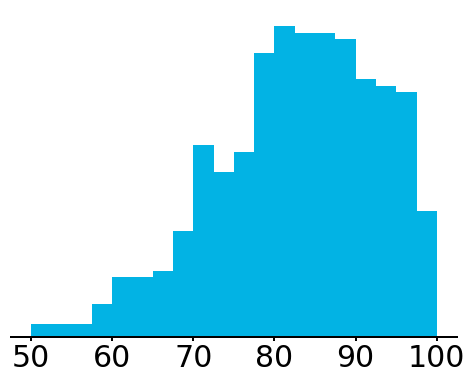

In [68]:
plt.figure(figsize = [8,6])

plt.hist(X, bins = np.arange(50,100+2.5,2.5), color = plot_colors[0])

plt.xticks([50, 60, 70, 80, 90, 100], fontsize = 30)
plt.yticks([])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(width = 2)
plt.savefig('C17_FeatureScaling_01.png'.format(key), transparent = True)

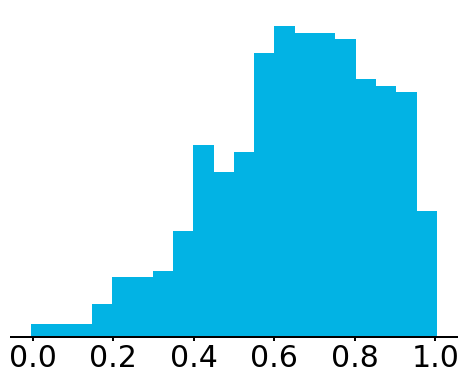

In [69]:
X_norm = (X - X.min())/(X.max() - X.min())

plt.figure(figsize = [8,6])

plt.hist(X_norm, bins = (np.arange(50,100+2.5,2.5) - X.min())/(X.max() - X.min()), color = plot_colors[0])

plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize = 30)
plt.yticks([])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(width = 2)
plt.savefig('C17_FeatureScaling_02.png'.format(key), transparent = True)

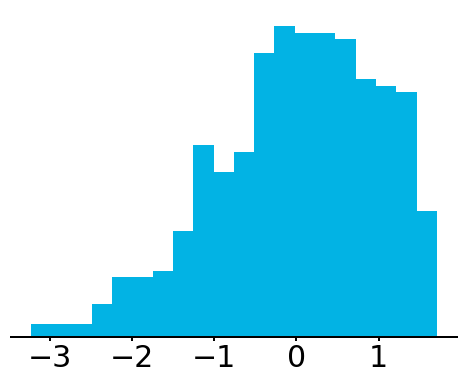

In [70]:
X_standard = (X - X.mean())/(X.std())

plt.figure(figsize = [8,6])

plt.hist(X_standard, bins = (np.arange(50,100+2.5,2.5) - X.mean())/X.std(), color = plot_colors[0])

plt.xticks([-3, -2, -1, 0, 1], fontsize = 30)
plt.yticks([])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(width = 2)
plt.savefig('C17_FeatureScaling_03.png'.format(key), transparent = True)

In [71]:
# use rejection sampling to get a uniform draw from a squared-up annulus (ring)
n_points = 120
X = np.random.RandomState(3200000).uniform(-3, 3, [n_points, 2])
X_abs = np.absolute(X)

inner_ring_flag = np.logical_and(X_abs[:,0] < 1.2, X_abs[:,1] < 1.2)
outer_ring_flag = X_abs.sum(axis = 1) > 5.3
keep = np.logical_not(np.logical_or(inner_ring_flag, outer_ring_flag))

X = X[keep]
X = X[:60] # only keep first 100

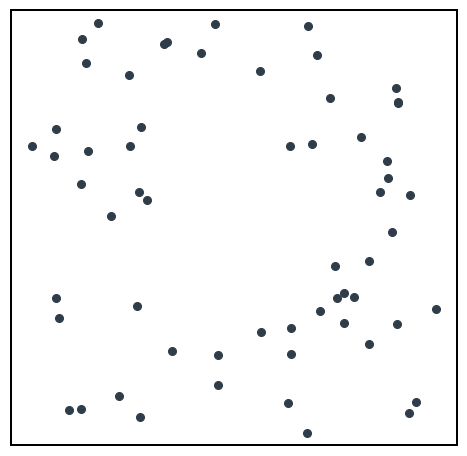

In [72]:
plt.figure(figsize = [8,8])

plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('equal')
plt.savefig('C17_FeatureScaling_04.png', transparent = True)

In [73]:
X1 = np.matmul(X, np.array([[1, 0], [0, 1/4]]))

n_clusters = 2
model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(X1)

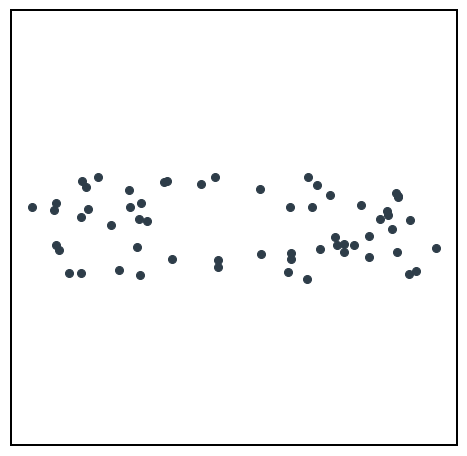

In [74]:
plt.figure(figsize = [8,8])

plt.scatter(X1[:,0], X1[:,1], s = 64, c = plot_colors[-1])

# for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
#     my_members = (preds == k)
#     plt.scatter(X1[my_members, 0], X1[my_members, 1], s = 64, c = col)

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('equal')
plt.savefig('C17_FeatureScaling_05a.png', transparent = True)

In [75]:
X2 = np.matmul(X, np.array([[1/4, 0], [0, 1]]))

n_clusters = 2
model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(X2)

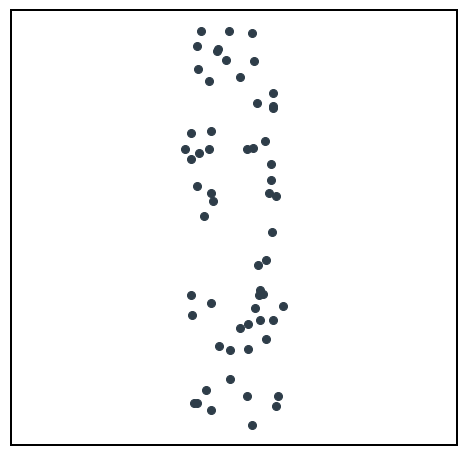

In [76]:
plt.figure(figsize = [8,8])

# for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
#     my_members = (preds == k)
#     plt.scatter(X2[my_members, 0], X2[my_members, 1], s = 64, c = col)

plt.scatter(X2[:,0], X2[:,1], s = 64, c = plot_colors[-1])

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('equal')
plt.savefig('C17_FeatureScaling_06a.png', transparent = True)

## C1.18: Feature Scaling Example

In [77]:
# use rejection sampling to get a uniform draw from a squared-up annulus (ring)
n_points = 120
X = np.random.RandomState(5000000).uniform(-3, 3, [n_points, 2])
X_abs = np.absolute(X)

inner_ring_flag = np.logical_and(X_abs[:,0] < 1, X_abs[:,1] < 1)
outer_ring_flag = X_abs.sum(axis = 1) > 5.5
keep = np.logical_not(np.logical_or(inner_ring_flag, outer_ring_flag))

X = X[keep]
X = X[:100] # only keep first 100

In [78]:
X1 = np.matmul(X, np.array([[2.5, 0], [0, 100]])) + np.array([22.5, 500])

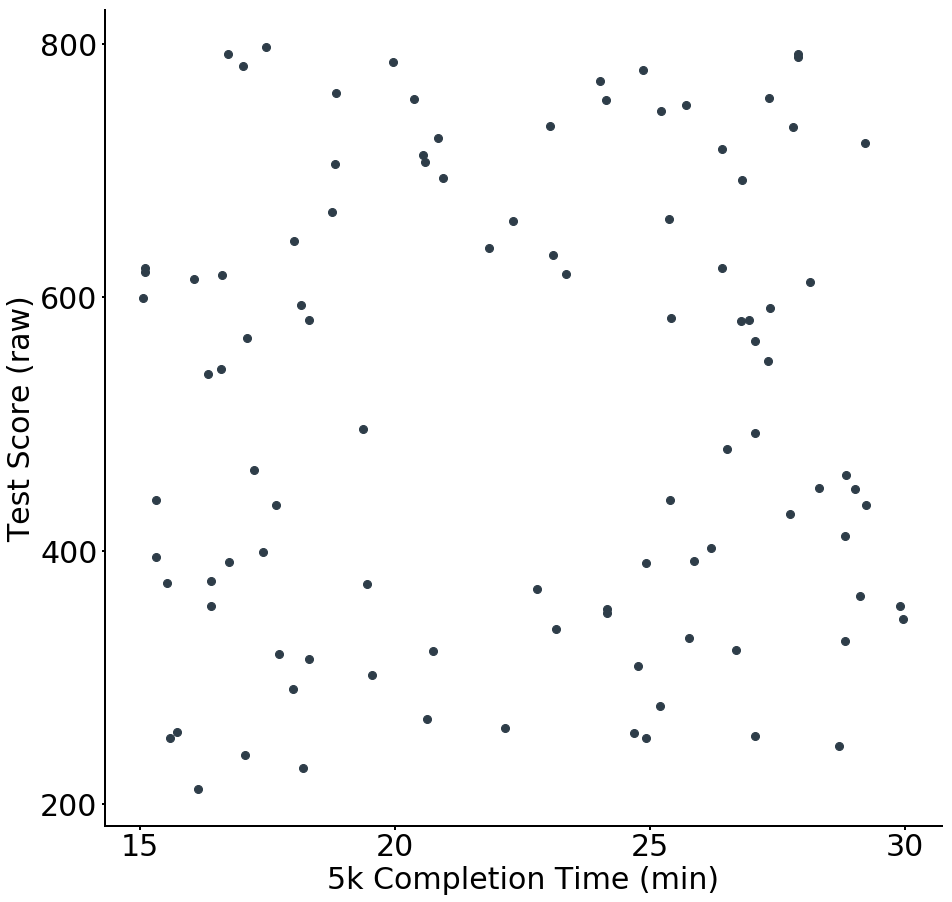

In [79]:
plt.figure(figsize = [15,15])

plt.scatter(X1[:,0], X1[:,1], s = 64, c = plot_colors[-1])

plt.xlabel('5k Completion Time (min)', size = 30)
plt.xticks(np.arange(15, 30+5, 5), fontsize = 30)
plt.ylabel('Test Score (raw)', size = 30)
plt.yticks(np.arange(200, 800+200, 200), fontsize = 30)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
[side.set_linewidth(2) for side in ax.spines.values()]
ax.tick_params(width = 2)
plt.savefig('C18_FeatScalingEx_01.png', transparent = True)

In [80]:
n_clusters = 2
model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(X1)

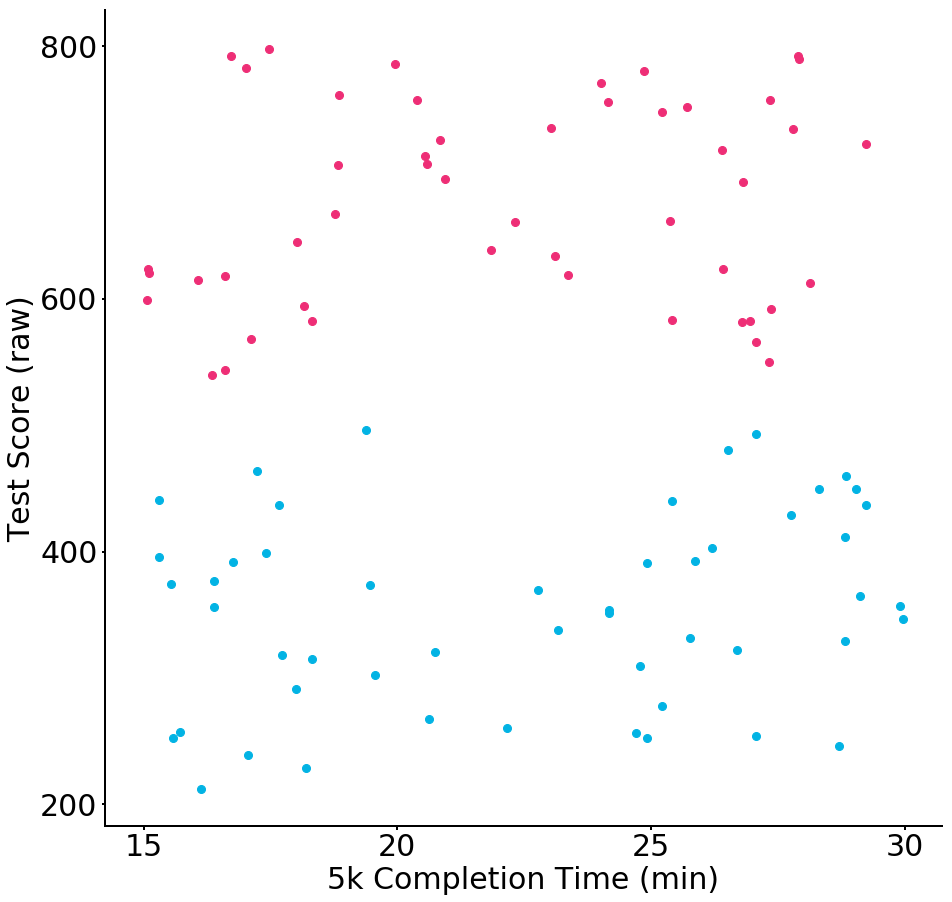

In [81]:
plt.figure(figsize = [15,15])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    plt.scatter(X1[my_members, 0], X1[my_members, 1], s = 64, c = col)

plt.xlabel('5k Completion Time (min)', size = 30)
plt.xticks(np.arange(15, 30+5, 5), fontsize = 30)
plt.ylabel('Test Score (raw)', size = 30)
plt.yticks(np.arange(200, 800+200, 200), fontsize = 30)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
[side.set_linewidth(2) for side in ax.spines.values()]
ax.tick_params(width = 2)
plt.savefig('C18_FeatScalingEx_02.png', transparent = True)

In [82]:
X2 = np.matmul(X, np.array([[150, 0], [0, 1]])) + np.array([1350, 0])

In [83]:
n_clusters = 2
model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(X2)

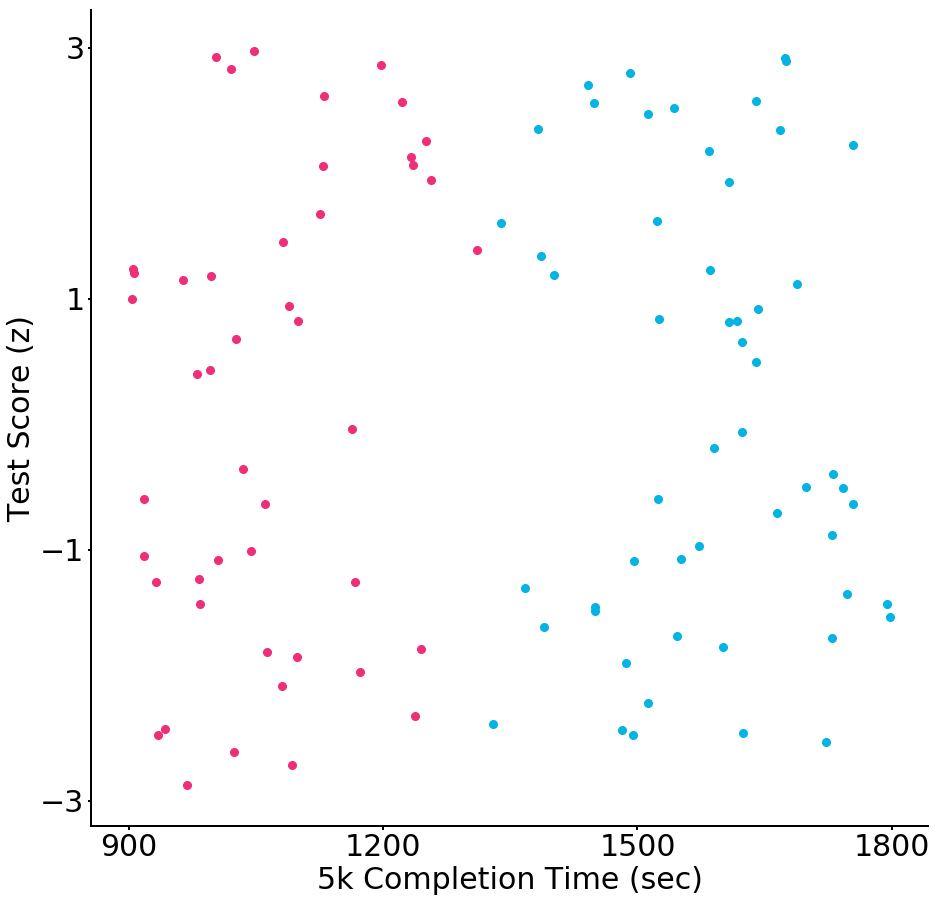

In [84]:
plt.figure(figsize = [15,15])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    plt.scatter(X2[my_members, 0], X2[my_members, 1], s = 64, c = col)

plt.xlabel('5k Completion Time (sec)', size = 30)
plt.xticks(np.arange(900, 1800+300, 300), fontsize = 30)
plt.ylabel('Test Score (z)', size = 30)
plt.yticks(np.arange(-3, 3+2, 2), fontsize = 30)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
[side.set_linewidth(2) for side in ax.spines.values()]
ax.tick_params(width = 2)
plt.savefig('C18_FeatScalingEx_04.png', transparent = True)

In [85]:
n_clusters = 2
model = KMeans(n_clusters = n_clusters, n_init = 1)
preds = model.fit_predict(X)

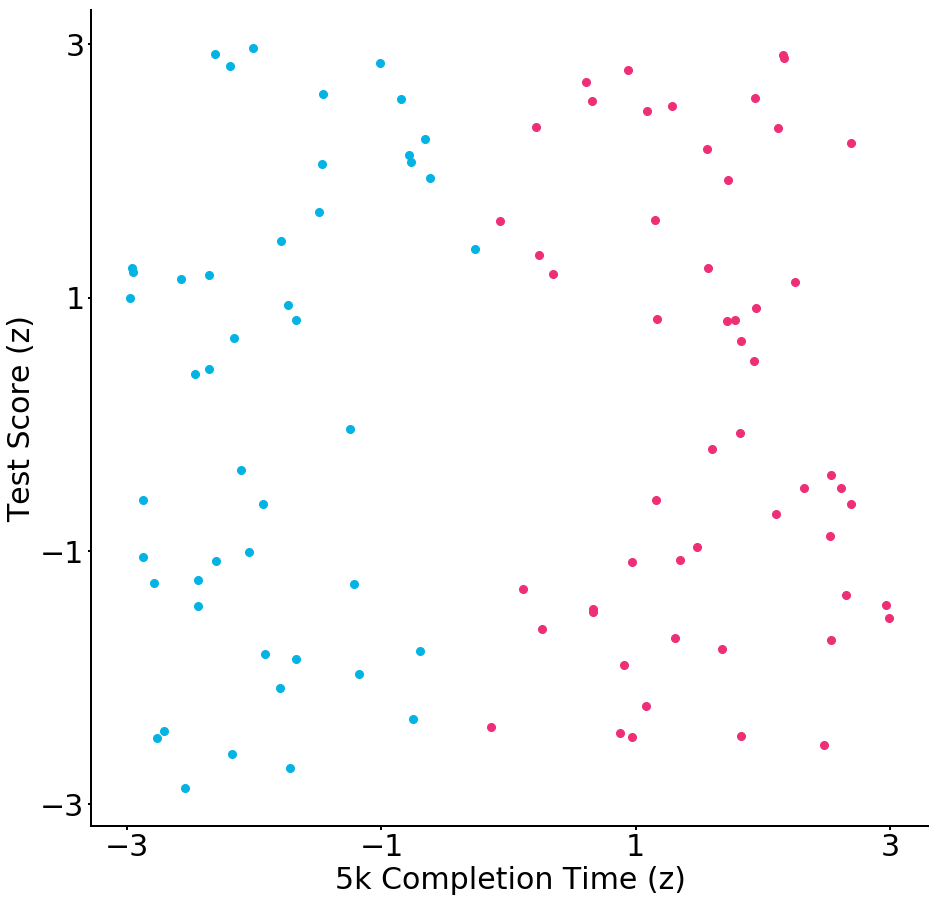

In [86]:
plt.figure(figsize = [15,15])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 64, c = col)

plt.xlabel('5k Completion Time (z)', size = 30)
plt.xticks(np.arange(-3, 3+2, 2), fontsize = 30)
plt.ylabel('Test Score (z)', size = 30)
plt.yticks(np.arange(-3, 3+2, 2), fontsize = 30)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
[side.set_linewidth(2) for side in ax.spines.values()]
ax.tick_params(width = 2)
plt.savefig('C18_FeatScalingEx_05.png', transparent = True)

In [87]:
X1[np.logical_and(X1[:,0] > 21,X1[:,0] < 24),:]

array([[ 23.03740036, 734.99427034],
       [ 23.1067983 , 633.77290421],
       [ 22.15677987, 260.68635174],
       [ 23.15885589, 338.10239488],
       [ 21.84298782, 638.72031875],
       [ 23.36419844, 618.76818098],
       [ 22.7818044 , 369.7461212 ],
       [ 22.32508835, 660.29249316]])